## Clustering

In [139]:
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [140]:
df=pd.read_excel('World military power.xlsx',header=1)

In [141]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
1,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,...,Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
2,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
3,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0
4,Argentina,0.6521,Argentina,227.0,Argentina,24.0,Argentina,7.0,Argentina,9.0,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.0,Argentina,11000.0,Argentina,11968.0


Regression - R2_score, RMSE 

Classification- Accuracy, Confusion Matix, Precision,Recallve F1 Score Classificaion Report a bakılıyor

Clustering - Silhouette Score bakılıyor

Tüm ML yada Reg. Class. ya Clustering dir.
Hava yarın kaç derece Reg, yarın hava yağar mı Classifion 

Clusterin Amazon para araştırması yapmayan müşterler, en yakın mesafeden ürün nereden gelir, şu binanın altı boşmuş dükkan açayım değil, nereye açılabilir. 

Temel olarak komşuları ile olan ilişkisine bakıyor

In [142]:
#df.profile_report()

In [143]:
df.columns

Index(['Military Strength', 'Military Strength Power Index',
       'Aircraft Strength', 'Aircraft Strength value',
       'Fighter/Interceptor Strength', 'Fighter/Interceptor Strength value',
       'Attack Aircraft Strength', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength',
       'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength',
       'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength',
       'Attack Helicopter Fleet Strength value', 'Tank Strength',
       'Tank Strength value', 'AFV/APC Strength', 'AFV/APC Strength value',
       'Self-Propelled Artillery Strength',
       'Self-Propelled Artillery Strength value', 'Towed Artillery Strength',
       'Towed Artillery Strength value', 'Rocket Projector Strength',
       'Rocket Projector Strength value', 'Navy Fleet Strengths',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength',


In [144]:
df.columns=df.columns.str.lower().str.replace(" ","_")

In [145]:
df.columns

Index(['military_strength', 'military_strength_power_index',
       'aircraft_strength', 'aircraft_strength_value',
       'fighter/interceptor_strength', 'fighter/interceptor_strength_value',
       'attack_aircraft_strength', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength',
       'transport_aircraft_fleet_strength_value', 'trainer_aircraft_fleet',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength',
       'helicopter_fleet_strength_value', 'attack_helicopter_fleet_strength',
       'attack_helicopter_fleet_strength_value', 'tank_strength',
       'tank_strength_value', 'afv/apc_strength', 'afv/apc_strength_value',
       'self-propelled_artillery_strength',
       'self-propelled_artillery_strength_value', 'towed_artillery_strength',
       'towed_artillery_strength_value', 'rocket_projector_strength',
       'rocket_projector_strength_value', 'navy_fleet_strengths',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength',


In [146]:
df.describe(include=object).T

,count,unique,top,freq
military_strength,138,138,Afghanistan,1
aircraft_strength,138,138,Afghanistan,1
fighter/interceptor_strength,138,138,Afghanistan,1
attack_aircraft_strength,138,138,Afghanistan,1
transport_aircraft_fleet_strength,138,138,Afghanistan,1
trainer_aircraft_fleet,138,138,Afghanistan,1
helicopter_fleet_strength,138,138,Afghanistan,1
attack_helicopter_fleet_strength,138,138,Afghanistan,1
tank_strength,138,138,Afghanistan,1
afv/apc_strength,138,138,Afghanistan,1


In [147]:
df.head()

,military_strength,military_strength_power_index,aircraft_strength,aircraft_strength_value,fighter/interceptor_strength,fighter/interceptor_strength_value,attack_aircraft_strength,attack_aircraft_strength_value,transport_aircraft_fleet_strength,transport_aircraft_fleet_strength_value,...,total_population,total_population_value,total_square_land_area,total_square_land_area_value,total_coastline_coverage,total_coastline_coverage_value,total_waterway_coverage,total_waterway_coverage_value,total_border_coverage,total_border_coverage_value
0,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
1,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,...,Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
2,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
3,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0
4,Argentina,0.6521,Argentina,227.0,Argentina,24.0,Argentina,7.0,Argentina,9.0,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.0,Argentina,11000.0,Argentina,11968.0


In [148]:
df.rename(columns={'military_strength':"country"},inplace=True)

In [149]:
df.head()

,country,military_strength_power_index,aircraft_strength,aircraft_strength_value,fighter/interceptor_strength,fighter/interceptor_strength_value,attack_aircraft_strength,attack_aircraft_strength_value,transport_aircraft_fleet_strength,transport_aircraft_fleet_strength_value,...,total_population,total_population_value,total_square_land_area,total_square_land_area_value,total_coastline_coverage,total_coastline_coverage_value,total_waterway_coverage,total_waterway_coverage_value,total_border_coverage,total_border_coverage_value
0,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
1,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,...,Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
2,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
3,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0
4,Argentina,0.6521,Argentina,227.0,Argentina,24.0,Argentina,7.0,Argentina,9.0,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.0,Argentina,11000.0,Argentina,11968.0


In [150]:
df.isnull().sum()

country                                     0
military_strength_power_index               0
aircraft_strength                           0
aircraft_strength_value                     0
fighter/interceptor_strength                0
fighter/interceptor_strength_value          0
attack_aircraft_strength                    0
attack_aircraft_strength_value              0
transport_aircraft_fleet_strength           0
transport_aircraft_fleet_strength_value     0
trainer_aircraft_fleet                      0
trainer_aircraft_fleet_value                0
helicopter_fleet_strength                   0
helicopter_fleet_strength_value             0
attack_helicopter_fleet_strength            0
attack_helicopter_fleet_strength_value      0
tank_strength                               0
tank_strength_value                         0
afv/apc_strength                            0
afv/apc_strength_value                      0
self-propelled_artillery_strength           0
self-propelled_artillery_strength_

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country                                  138 non-null    object 
 1   military_strength_power_index            138 non-null    float64
 2   aircraft_strength                        138 non-null    object 
 3   aircraft_strength_value                  138 non-null    float64
 4   fighter/interceptor_strength             138 non-null    object 
 5   fighter/interceptor_strength_value       138 non-null    float64
 6   attack_aircraft_strength                 138 non-null    object 
 7   attack_aircraft_strength_value           138 non-null    float64
 8   transport_aircraft_fleet_strength        138 non-null    object 
 9   transport_aircraft_fleet_strength_value  138 non-null    float64
 10  trainer_aircraft_fleet                   138 non-n

In [152]:
df.corr()

,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,self-propelled_artillery_strength_value,towed_artillery_strength_value,rocket_projector_strength_value,navy_fleet_strengths_value,aircraft_carrier_fleet_strength_value,submarine_fleet_strength_value,destroyer_fleet_strength_value,frigate_fleet_strength_value,airport_totals_value,total_border_coverage_value
military_strength_power_index,1.000000,-0.267329,-0.310888,-0.241948,-0.267104,-0.284756,-0.244545,-0.231723,-0.324300,-0.361796,-0.268935,-0.335405,-0.247800,-0.375253,-0.195382,-0.322829,-0.207112,-0.421650,-0.173362,-0.278147
aircraft_strength_value,-0.267329,1.000000,0.944492,0.860263,0.974029,0.974288,0.992802,0.964266,0.625598,0.844898,0.513687,0.566740,0.520071,0.526446,0.922611,0.668530,0.915876,0.232956,0.884260,0.431274
fighter/interceptor_strength_value,-0.310888,0.944492,1.000000,0.878844,0.908768,0.886299,0.905858,0.922056,0.719875,0.932691,0.659839,0.696251,0.669376,0.664113,0.806006,0.802354,0.877554,0.451837,0.733474,0.508782
attack_aircraft_strength_value,-0.241948,0.860263,0.878844,1.000000,0.892666,0.762131,0.820890,0.916149,0.812318,0.871821,0.776320,0.684005,0.772270,0.631921,0.656635,0.761357,0.734484,0.323042,0.663088,0.615603
transport_aircraft_fleet_strength_value,-0.267104,0.974029,0.908768,0.892666,1.000000,0.927991,0.964244,0.948860,0.647605,0.818061,0.530161,0.576765,0.542214,0.518940,0.870717,0.649020,0.868212,0.232091,0.874719,0.523876
trainer_aircraft_fleet_value,-0.284756,0.974288,0.886299,0.762131,0.927991,1.000000,0.973744,0.909770,0.547113,0.773963,0.392221,0.495196,0.400216,0.457386,0.936417,0.576860,0.886580,0.165191,0.899261,0.337081
helicopter_fleet_strength_value,-0.244545,0.992802,0.905858,0.820890,0.964244,0.973744,1.000000,0.953013,0.568368,0.798437,0.453496,0.509179,0.448298,0.466387,0.943658,0.606240,0.911284,0.160675,0.904459,0.375196
attack_helicopter_fleet_strength_value,-0.231723,0.964266,0.922056,0.916149,0.948860,0.909770,0.953013,1.000000,0.693216,0.860358,0.640999,0.570675,0.614542,0.508812,0.855873,0.682027,0.882033,0.236247,0.812823,0.462982
tank_strength_value,-0.324300,0.625598,0.719875,0.812318,0.647605,0.547113,0.568368,0.693216,1.000000,0.778759,0.830509,0.805103,0.864147,0.686335,0.368344,0.746872,0.447492,0.325212,0.346984,0.484769
afv/apc_strength_value,-0.361796,0.844898,0.932691,0.871821,0.818061,0.773963,0.798437,0.860358,0.778759,1.000000,0.790061,0.765663,0.751266,0.689494,0.663752,0.787019,0.745806,0.498937,0.591883,0.507885


In [153]:
abs(df.corr()['military_strength_power_index']).sort_values(ascending=False)

military_strength_power_index              1.000000
frigate_fleet_strength_value               0.421650
navy_fleet_strengths_value                 0.375253
afv/apc_strength_value                     0.361796
towed_artillery_strength_value             0.335405
tank_strength_value                        0.324300
submarine_fleet_strength_value             0.322829
fighter/interceptor_strength_value         0.310888
trainer_aircraft_fleet_value               0.284756
total_border_coverage_value                0.278147
self-propelled_artillery_strength_value    0.268935
aircraft_strength_value                    0.267329
transport_aircraft_fleet_strength_value    0.267104
rocket_projector_strength_value            0.247800
helicopter_fleet_strength_value            0.244545
attack_aircraft_strength_value             0.241948
attack_helicopter_fleet_strength_value     0.231723
destroyer_fleet_strength_value             0.207112
aircraft_carrier_fleet_strength_value      0.195382
airport_tota

In [154]:
abs(df.corr()['navy_fleet_strengths_value']).sort_values(ascending=False)

navy_fleet_strengths_value                 1.000000
submarine_fleet_strength_value             0.878558
rocket_projector_strength_value            0.778811
afv/apc_strength_value                     0.689494
tank_strength_value                        0.686335
fighter/interceptor_strength_value         0.664113
attack_aircraft_strength_value             0.631921
towed_artillery_strength_value             0.618531
self-propelled_artillery_strength_value    0.615880
frigate_fleet_strength_value               0.559458
aircraft_strength_value                    0.526446
transport_aircraft_fleet_strength_value    0.518940
attack_helicopter_fleet_strength_value     0.508812
helicopter_fleet_strength_value            0.466387
total_border_coverage_value                0.462016
trainer_aircraft_fleet_value               0.457386
destroyer_fleet_strength_value             0.436761
military_strength_power_index              0.375253
aircraft_carrier_fleet_strength_value      0.339865
airport_tota

In [155]:
df.groupby('navy_fleet_strengths')['navy_fleet_strengths_value'].value_counts().isnull()

navy_fleet_strengths  navy_fleet_strengths_value
Afghanistan           0.0                           False
Albania               38.0                          False
Algeria               201.0                         False
Angola                57.0                          False
Argentina             49.0                          False
                                                    ...  
Venezuela             49.0                          False
Vietnam               65.0                          False
Yemen                 30.0                          False
Zambia                0.0                           False
Zimbabwe              0.0                           False
Name: navy_fleet_strengths_value, Length: 124, dtype: bool

In [156]:
#df[df.columns.str.contains("value")]

df_value=df.filter(regex='value$',axis='columns')
df_value

,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,self-propelled_artillery_strength_value,...,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,total_square_land_area_value,total_coastline_coverage_value,total_waterway_coverage_value,total_border_coverage_value
0,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,...,43.0,0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0,5987.0
1,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,...,4.0,16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0,691.0
2,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,...,157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0,6734.0
3,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,...,176.0,"16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0,5369.0
4,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,...,1138.0,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0,11968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,73.0,...,444.0,"20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800.0,7100.0,5267.0
134,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,70.0,...,45.0,"2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444.0,17702.0,4616.0
135,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,20.0,...,57.0,12260.0,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906.0,0.0,1601.0
136,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,184.0,0.0,...,88.0,0.0,21000.0,0.0,"61,66,905","1,64,45,079","7,52,618",NaN,2250.0,6043.0


In [157]:
df_value.insert(0, "country", df["country"])
df_value.insert(1, "Military Strength Power Index", df["military_strength_power_index"])

In [158]:
df_value

,country,Military Strength Power Index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,...,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,total_square_land_area_value,total_coastline_coverage_value,total_waterway_coverage_value,total_border_coverage_value
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,...,43.0,0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0,5987.0
1,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,...,4.0,16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0,691.0
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,...,157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0,6734.0
3,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,...,176.0,"16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0,5369.0
4,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,...,1138.0,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0,11968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,...,444.0,"20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800.0,7100.0,5267.0
134,Vietnam,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,...,45.0,"2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444.0,17702.0,4616.0
135,Yemen,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,...,57.0,12260.0,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906.0,0.0,1601.0
136,Zambia,1.6464,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,...,88.0,0.0,21000.0,0.0,"61,66,905","1,64,45,079","7,52,618",NaN,2250.0,6043.0


In [159]:
df

,country,military_strength_power_index,aircraft_strength,aircraft_strength_value,fighter/interceptor_strength,fighter/interceptor_strength_value,attack_aircraft_strength,attack_aircraft_strength_value,transport_aircraft_fleet_strength,transport_aircraft_fleet_strength_value,...,total_population,total_population_value,total_square_land_area,total_square_land_area_value,total_coastline_coverage,total_coastline_coverage_value,total_waterway_coverage,total_waterway_coverage_value,total_border_coverage,total_border_coverage_value
0,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
1,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,...,Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
2,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
3,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0
4,Argentina,0.6521,Argentina,227.0,Argentina,24.0,Argentina,7.0,Argentina,9.0,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.0,Argentina,11000.0,Argentina,11968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,0.6449,Venezuela,260.0,Venezuela,38.0,Venezuela,0.0,Venezuela,52.0,...,Venezuela,"3,16,89,176",Venezuela,"9,12,050",Venezuela,2800.0,Venezuela,7100.0,Venezuela,5267.0
134,Vietnam,0.3559,Vietnam,293.0,Vietnam,77.0,Vietnam,0.0,Vietnam,38.0,...,Vietnam,"9,70,40,334",Vietnam,"3,31,210",Vietnam,3444.0,Vietnam,17702.0,Vietnam,4616.0
135,Yemen,1.2412,Yemen,169.0,Yemen,77.0,Yemen,0.0,Yemen,8.0,...,Yemen,"2,86,67,230",Yemen,"5,27,968",Yemen,1906.0,Yemen,0.0,Yemen,1601.0
136,Zambia,1.6464,Zambia,108.0,Zambia,18.0,Zambia,0.0,Zambia,11.0,...,Zambia,"1,64,45,079",Zambia,"7,52,618",NaN,NaN,Zambia,2250.0,Zambia,6043.0


In [160]:
#df['navy_fleet_strengths_value']=df['navy_fleet_strengths_value'].fillna(df.groupby('submarine_fleet_strength')['navy_fleet_strengths_value'].mean())
#df.navy_fleet_strengths_valuet=df.navy_fleet_strengths_value.fillna(value=df.groupby('submarine_fleet_strength')['navy_fleet_strengths_value'].mean())

C:\Users\BOLBAHADIR\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

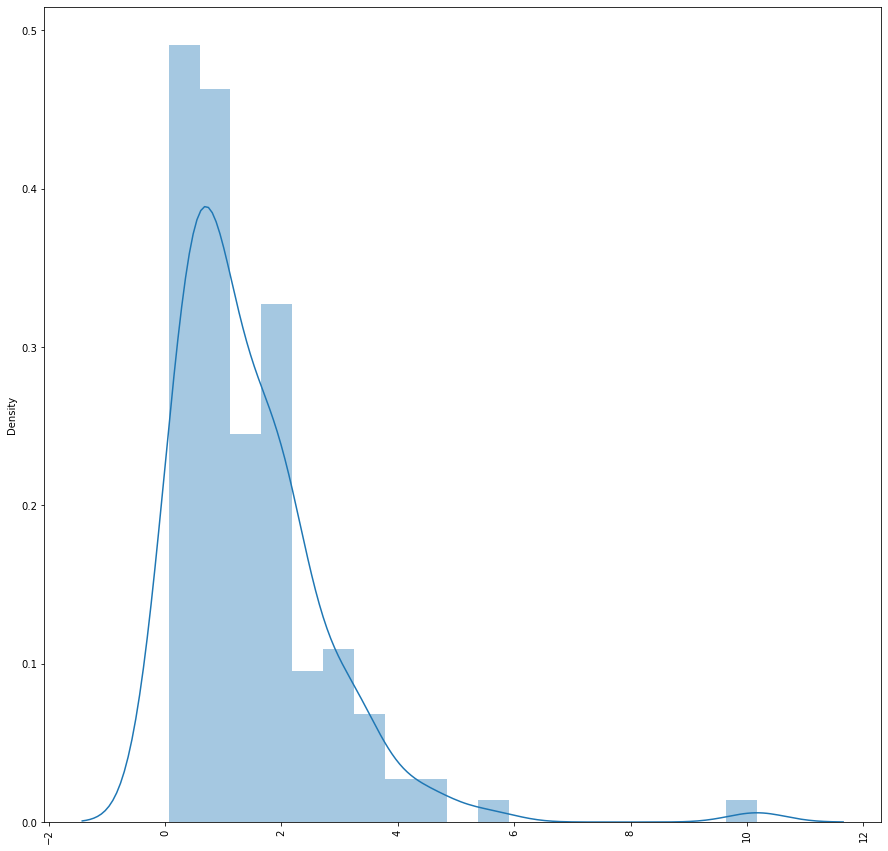

In [161]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.distplot(x=df_value['Military Strength Power Index'])



In [162]:
with pd.option_context('display.max_columns', None):
    display(df[df["total_coastline_coverage"].isna()])

,country,military_strength_power_index,aircraft_strength,aircraft_strength_value,fighter/interceptor_strength,fighter/interceptor_strength_value,attack_aircraft_strength,attack_aircraft_strength_value,transport_aircraft_fleet_strength,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet,trainer_aircraft_fleet_value,helicopter_fleet_strength,helicopter_fleet_strength_value,attack_helicopter_fleet_strength,attack_helicopter_fleet_strength_value,tank_strength,tank_strength_value,afv/apc_strength,afv/apc_strength_value,self-propelled_artillery_strength,self-propelled_artillery_strength_value,towed_artillery_strength,towed_artillery_strength_value,rocket_projector_strength,rocket_projector_strength_value,navy_fleet_strengths,navy_fleet_strengths_value,aircraft_carrier_fleet_strength,aircraft_carrier_fleet_strength_value,submarine_fleet_strength,submarine_fleet_strength_value,destroyer_fleet_strength,destroyer_fleet_strength_value,frigate_fleet_strength,frigate_fleet_strength_value,defense_spending_budget,defense_spending_budget_value,external_debt,external_debt_value,airport_totals,airport_totals_value,oil_production,oil_production_value,oil_consumption,oil_consumption_value,proven_oil_reserves,proven_oil_reserves_value,available_manpower,available_manpower_value,total_population,total_population_value,total_square_land_area,total_square_land_area_value,total_coastline_coverage,total_coastline_coverage_value,total_waterway_coverage,total_waterway_coverage_value,total_border_coverage,total_border_coverage_value
5,Armenia,2.1251,Armenia,64.0,Armenia,0.0,Armenia,9.0,Armenia,3.0,Armenia,13.0,Armenia,37.0,Armenia,20.0,Armenia,110.0,Armenia,748.0,Armenia,38.0,Armenia,150.0,Armenia,68.0,Armenia,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Armenia,"1,38,50,00,000",Armenia,"10,41,00,00,000",Armenia,11.0,Armenia,0.0,Armenia,47500.0,Armenia,0.0,Armenia,"16,96,085",Armenia,"30,38,217",Armenia,29743.0,NaN,NaN,Armenia,0.0,Armenia,1570.0
7,Austria,0.9568,Austria,120.0,Austria,15.0,Austria,0.0,Austria,11.0,Austria,32.0,Austria,62.0,Austria,0.0,Austria,56.0,Austria,467.0,Austria,33.0,Austria,0.0,Austria,0.0,Austria,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Austria,"3,38,00,00,000",Austria,"6,30,80,00,00,000",Austria,52.0,Austria,14260.0,Austria,"2,15,000",Austria,"4,30,00,000",Austria,"40,17,691",Austria,"87,93,370",Austria,83871.0,NaN,NaN,Austria,0.0,Austria,2524.0
11,Belarus,0.8179,Belarus,202.0,Belarus,39.0,Belarus,68.0,Belarus,4.0,Belarus,28.0,Belarus,63.0,Belarus,21.0,Belarus,532.0,Belarus,1560.0,Belarus,482.0,Belarus,228.0,Belarus,238.0,Belarus,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Belarus,"62,37,02,800",Belarus,"39,92,00,00,000",Belarus,65.0,Belarus,32000.0,Belarus,"1,90,000",Belarus,"19,80,00,000",Belarus,"49,82,905",Belarus,"95,27,543",Belarus,"2,07,600",NaN,NaN,Belarus,2500.0,Belarus,3599.0
13,Bhutan,10.1681,Bhutan,2.0,Bhutan,0.0,Bhutan,0.0,Bhutan,0.0,Bhutan,0.0,Bhutan,2.0,Bhutan,0.0,Bhutan,0.0,Bhutan,27.0,Bhutan,0.0,Bhutan,0.0,Bhutan,0.0,Bhutan,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bhutan,"2,51,20,000",Bhutan,"2,67,10,00,000",Bhutan,2.0,Bhutan,0.0,Bhutan,2000.0,Bhutan,0.0,Bhutan,"1,76,808",Bhutan,"7,66,397",Bhutan,38394.0,NaN,NaN,Bhutan,0.0,Bhutan,1136.0
14,Bolivia,0.9942,Bolivia,69.0,Bolivia,0.0,Bolivia,0.0,Bolivia,14.0,Bolivia,23.0,Bolivia,38.0,Bolivia,0.0,Bolivia,54.0,Bolivia,137.0,Bolivia,0.0,Bolivia,86.0,Bolivia,0.0,Bolivia,173.0,Bolivia,0.0,Bolivia,0.0,Bolivia,0.0,Bolivia,0.0,Bolivia,"66,00,00,000",Bolivia,"12,81,00,00,000",Bolivia,855.0,Bolivia,59330.0,Bolivia,60000.0,Bolivia,"21,15,00,000",Bolivia,"50,75,416",Bolivia,"1,13,06,341",Bolivia,"10,98,581",NaN,NaN,Bolivia,10000.0,Bolivia,7252.0
16,Botswana,2.0582,Botswana,45.0,Botswana,10.0,Botswana,0.0,Botswana,11.0,Botswana,8.0,Botswana,16.0,Botswana,0.0,Botswana,55.0,Botswana,245.0,Botswana,0.0,Botswana,30.0,Botswana,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Botswana,"45,00,00,000",Botswana,"2,18,70,00,000",Botswana,74.0,Botswana,0.0,Botswana,16500.0,Botswana,0.0,Botswana,"9,62,617",Botsw

In [163]:
# Any of Nan value country has no seaside. so value assign as 0 
df_value.loc[df_value['total_coastline_coverage_value'].isnull(), 'total_coastline_coverage_value']  = 0
df_value.loc[df_value['navy_fleet_strengths_value'].isnull(), 'navy_fleet_strengths_value']  = 0
df_value.loc[df_value['aircraft_carrier_fleet_strength_value'].isnull(), 'aircraft_carrier_fleet_strength_value']  = 0
df_value.loc[df_value['submarine_fleet_strength_value'].isnull(), 'submarine_fleet_strength_value']  = 0
df_value.loc[df_value['destroyer_fleet_strength_value'].isnull(), 'destroyer_fleet_strength_value']  = 0
df_value.loc[df_value['frigate_fleet_strength_value'].isnull(), 'frigate_fleet_strength_value']  = 0
df_value.loc[df_value['total_border_coverage_value'].isnull(), 'total_border_coverage_value']  = 0

In [164]:
df_value.isnull().sum()

country                                    0
Military Strength Power Index              0
aircraft_strength_value                    0
fighter/interceptor_strength_value         0
attack_aircraft_strength_value             0
transport_aircraft_fleet_strength_value    0
trainer_aircraft_fleet_value               0
helicopter_fleet_strength_value            0
attack_helicopter_fleet_strength_value     0
tank_strength_value                        0
afv/apc_strength_value                     0
self-propelled_artillery_strength_value    0
towed_artillery_strength_value             0
rocket_projector_strength_value            0
navy_fleet_strengths_value                 0
aircraft_carrier_fleet_strength_value      0
submarine_fleet_strength_value             0
destroyer_fleet_strength_value             0
frigate_fleet_strength_value               0
defense_spending_budget_value              0
external_debt_value                        0
airport_totals_value                       0
oil_produc

In [165]:
df_value.select_dtypes("object")

,country,defense_spending_budget_value,external_debt_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,total_square_land_area_value,total_coastline_coverage_value,total_waterway_coverage_value
0,Afghanistan,"12,00,00,00,000","2,84,00,00,000",0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0
1,Albania,"25,00,00,000","9,50,50,00,000",16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0
2,Algeria,"13,00,00,00,000","6,26,00,00,000","13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0
3,Angola,"7,00,00,00,000","42,08,00,00,000","16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0
4,Argentina,"4,20,00,00,000","2,14,90,00,00,000","4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0
...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,"74,50,00,000","1,00,30,00,00,000","20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800.0,7100.0
134,Vietnam,"5,50,00,00,000","96,58,00,00,000","2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444.0,17702.0
135,Yemen,"1,40,00,00,000","7,06,80,00,000",12260.0,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906.0,0.0
136,Zambia,"4,00,00,000","11,66,00,00,000",0.0,21000.0,0.0,"61,66,905","1,64,45,079","7,52,618",0,2250.0


In [166]:
df_value=df_value.drop(['country'],axis=1)

In [167]:
#s = df_value.select_dtypes(include='object').columns
#df_value[s] = df_value[s].astype("float")
#df_value[s].convert_objects(convert_numeric=True)
#d_value[s]= df_value[s].replace(',','')
#df_value = df_value.apply(pd.to_numeric, errors='coerce', downcast='float') # bu olmadı tüm , değerleri Nan eşitletdi

In [168]:
'''
def replacee(s):
    i=str(s).find(',')
if(i>0):
    return s[:i] + '.' + s[i+1:]
else :
     return s 
     
'''     

"\ndef replacee(s):\n    i=str(s).find(',')\nif(i>0):\n    return s[:i] + '.' + s[i+1:]\nelse :\n     return s \n     \n"

### DF_VALUE da ki objectler aşağıdaki kodlar sonunda , ler . a döndü.

In [169]:
#df_value = df_value[(x.replace(',', '.') for x in df_value)]
df_value = df_value.apply(lambda x: x.replace(',', '',regex=True))

### ŞİMDİ OBJECTLERİ FLOAT ' A ÇEVİRCEZ

In [170]:
#df_value = df_value.apply(pd.to_numeric, errors='coerce', downcast='float')
df_value=df_value.astype(float)

In [171]:
df_value

,Military Strength Power Index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,...,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,total_square_land_area_value,total_coastline_coverage_value,total_waterway_coverage_value,total_border_coverage_value
0,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,...,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0
1,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,...,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691.0
2,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,...,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0
3,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,...,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0
4,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,...,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,...,444.0,2007000.0,575000.0,3.009000e+11,14260129.0,31689176.0,912050.0,2800.0,7100.0,5267.0
134,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,...,45.0,271400.0,525000.0,4.400000e+09,51043216.0,97040334.0,331210.0,3444.0,17702.0,4616.0
135,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,...,57.0,12260.0,145000.0,3.000000e+09,11266221.0,28667230.0,527968.0,1906.0,0.0,1601.0
136,1.6464,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,184.0,...,88.0,0.0,21000.0,0.000000e+00,6166905.0,16445079.0,752618.0,0.0,2250.0,6043.0


In [172]:
'''
for col in df_value.columns:
    if df_value.dtypes[col] == np.object | df_value[col].str.contains(','):
        
        df_value[col]=df_value[col].replace(',','.',regex=True)
        
        
        #df_value[col]=df_value[col].astype('float')
        #df_value[col] = df_value[col].apply(lambda x : x.replace(",", "") if type(x) != int else x).astype("float")
        
        #apply(lambda x : x.replace(",", "") if type(x) != int else x).astype("float")
'''

'\nfor col in df_value.columns:\n    if df_value.dtypes[col] == np.object | df_value[col].str.contains(\',\'):\n        \n        df_value[col]=df_value[col].replace(\',\',\'.\',regex=True)\n        \n        \n        #df_value[col]=df_value[col].astype(\'float\')\n        #df_value[col] = df_value[col].apply(lambda x : x.replace(",", "") if type(x) != int else x).astype("float")\n        \n        #apply(lambda x : x.replace(",", "") if type(x) != int else x).astype("float")\n'

In [173]:
df_value.isnull().sum()

Military Strength Power Index              0
aircraft_strength_value                    0
fighter/interceptor_strength_value         0
attack_aircraft_strength_value             0
transport_aircraft_fleet_strength_value    0
trainer_aircraft_fleet_value               0
helicopter_fleet_strength_value            0
attack_helicopter_fleet_strength_value     0
tank_strength_value                        0
afv/apc_strength_value                     0
self-propelled_artillery_strength_value    0
towed_artillery_strength_value             0
rocket_projector_strength_value            0
navy_fleet_strengths_value                 0
aircraft_carrier_fleet_strength_value      0
submarine_fleet_strength_value             0
destroyer_fleet_strength_value             0
frigate_fleet_strength_value               0
defense_spending_budget_value              0
external_debt_value                        0
airport_totals_value                       0
oil_production_value                       0
oil_consum

In [174]:
df_value.select_dtypes("object")

""
0
1
2
3
4
...
133
134
135
136


In [175]:
df_value

,Military Strength Power Index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,...,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,total_square_land_area_value,total_coastline_coverage_value,total_waterway_coverage_value,total_border_coverage_value
0,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,...,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0
1,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,...,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691.0
2,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,...,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0
3,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,...,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0
4,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,...,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,...,444.0,2007000.0,575000.0,3.009000e+11,14260129.0,31689176.0,912050.0,2800.0,7100.0,5267.0
134,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,...,45.0,271400.0,525000.0,4.400000e+09,51043216.0,97040334.0,331210.0,3444.0,17702.0,4616.0
135,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,...,57.0,12260.0,145000.0,3.000000e+09,11266221.0,28667230.0,527968.0,1906.0,0.0,1601.0
136,1.6464,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,184.0,...,88.0,0.0,21000.0,0.000000e+00,6166905.0,16445079.0,752618.0,0.0,2250.0,6043.0


In [176]:
df_value.info(),df_value.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength Power Index            138 non-null    float64
 1   aircraft_strength_value                  138 non-null    float64
 2   fighter/interceptor_strength_value       138 non-null    float64
 3   attack_aircraft_strength_value           138 non-null    float64
 4   transport_aircraft_fleet_strength_value  138 non-null    float64
 5   trainer_aircraft_fleet_value             138 non-null    float64
 6   helicopter_fleet_strength_value          138 non-null    float64
 7   attack_helicopter_fleet_strength_value   138 non-null    float64
 8   tank_strength_value                      138 non-null    float64
 9   afv/apc_strength_value                   138 non-null    float64
 10  self-propelled_artillery_strength_value  138 non-n

(None,
 Military Strength Power Index              0
 aircraft_strength_value                    0
 fighter/interceptor_strength_value         0
 attack_aircraft_strength_value             0
 transport_aircraft_fleet_strength_value    0
 trainer_aircraft_fleet_value               0
 helicopter_fleet_strength_value            0
 attack_helicopter_fleet_strength_value     0
 tank_strength_value                        0
 afv/apc_strength_value                     0
 self-propelled_artillery_strength_value    0
 towed_artillery_strength_value             0
 rocket_projector_strength_value            0
 navy_fleet_strengths_value                 0
 aircraft_carrier_fleet_strength_value      0
 submarine_fleet_strength_value             0
 destroyer_fleet_strength_value             0
 frigate_fleet_strength_value               0
 defense_spending_budget_value              0
 external_debt_value                        0
 airport_totals_value                       0
 oil_production_value      

In [177]:
with pd.option_context('display.max_rows',138 ,'display.max_columns', None): 
    display(df_value)

,Military Strength Power Index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,self-propelled_artillery_strength_value,towed_artillery_strength_value,rocket_projector_strength_value,navy_fleet_strengths_value,aircraft_carrier_fleet_strength_value,submarine_fleet_strength_value,destroyer_fleet_strength_value,frigate_fleet_strength_value,defense_spending_budget_value,external_debt_value,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,total_square_land_area_value,total_coastline_coverage_value,total_waterway_coverage_value,total_border_coverage_value
0,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,1.200000e+10,2.840000e+09,43.0,0.0,5500.0,0.000000e+00,14325743.0,3.494084e+07,652230.0,0.0,1200.0,5987.0
1,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,2.500000e+08,9.505000e+09,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3.057220e+06,28748.0,362.0,41.0,691.0
2,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,1.300000e+10,6.260000e+09,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,4.165749e+07,2381741.0,998.0,0.0,6734.0
3,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7.000000e+09,4.208000e+10,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,3.035588e+07,1246700.0,1600.0,1300.0,5369.0
4,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4.200000e+09,2.149000e+11,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,4.469420e+07,2780400.0,4989.0,11000.0,11968.0
5,2.1251,64.0,0.0,9.0,3.0,13.0,37.0,20.0,110.0,748.0,38.0,150.0,68.0,0.0,0.0,0.0,0.0,0.0,1.385000e+09,1.041000e+10,11.0,0.0,47500.0,0.000000e+00,1696085.0,3.038217e+06,29743.0,0.0,0.0,1570.0
6,0.3225,464.0,82.0,6.0,38.0,174.0,133.0,22.0,59.0,3051.0,0.0,54.0,0.0,48.0,2.0,6.0,2.0,8.0,2.630000e+10,1.714000e+12,480.0,263000.0,1005000.0,1.821000e+09,10808002.0,2.347014e+07,7741220.0,25760.0,2000.0,0.0
7,0.9568,120.0,15.0,0.0,11.0,32.0,62.0,0.0,56.0,467.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.380000e+09,6.308000e+11,52.0,14260.0,215000.0,4.300000e+07,4017691.0,8.793370e+06,83871.0,0.0,0.0,2524.0
8,0.9463,147.0,17.0,12.0,1.0,29.0,88.0,17.0,570.0,1451.0,187.0,227.0,162.0,31.0,0.0,4.0,0.0,1.0,2.805000e+09,1.741000e+10,37.0,789300.0,180000.0,7.000000e+09,5042346.0,1.004652e+07,86600.0,713.0,0.0,2468.0
9,1.8547,109.0,17.0,0.0,2.0,37.0,65.0,22.0,180.0,843.0,33.0,26.0,17.0,39.0,0.0,0.0,0.0,1.0,1.415000e+09,5.215000e+10,4.0,45000.0,55000.0,1.246000e+08,806505.0,1.422659e+06,760.0,161.0,0.0,0.0


In [178]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [179]:
import matplotlib.pyplot as plt

In [180]:
df_value.columns

Index(['Military Strength Power Index', 'aircraft_strength_value',
       'fighter/interceptor_strength_value', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength_value',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength_value',
       'attack_helicopter_fleet_strength_value', 'tank_strength_value',
       'afv/apc_strength_value', 'self-propelled_artillery_strength_value',
       'towed_artillery_strength_value', 'rocket_projector_strength_value',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength_value',
       'submarine_fleet_strength_value', 'destroyer_fleet_strength_value',
       'frigate_fleet_strength_value', 'defense_spending_budget_value',
       'external_debt_value', 'airport_totals_value', 'oil_production_value',
       'oil_consumption_value', 'proven_oil_reserves_value',
       'available_manpower_value', 'total_population_value',
       'total_square_land_area_value', 'total_coastline_coverage_value',
       '

### AIR FORCES OF CLUSTERING

In [181]:
x=df_value[['Military Strength Power Index','aircraft_strength_value',
       'fighter/interceptor_strength_value', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength_value',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength_value',
       'attack_helicopter_fleet_strength_value']]

In [182]:
x.head()

,Military Strength Power Index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value
0,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0
1,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0
2,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0
3,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0
4,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0


In [183]:
model=KMeans(n_clusters=7) # veriyi 4 kümeye ayır demek 

In [184]:
model=model.fit(x) # burada fark ettiysen y yok. yani sonuç tahmin etmiyor sadece kümeleme

In [185]:
tahmin=model.predict(x)

In [186]:
tahmin

array([4, 0, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0,
       4, 0, 0, 4, 5, 4, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 3, 0, 0, 6,
       0, 4, 0, 0, 0, 3, 4, 4, 4, 0, 4, 6, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 6,
       0, 0, 0, 3, 0, 0, 4, 0, 4, 0, 0, 0, 0, 2, 6, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 4, 0, 0, 0, 0, 0, 4, 6, 0, 0, 4, 0, 6, 0, 0, 4, 4, 6, 1, 0,
       0, 4, 4, 0, 0, 0])

In [187]:
x['cluster']=tahmin

C:\Users\BOLBAHADIR\AppData\Local\Temp\ipykernel_8796\1051485789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster']=tahmin


In [188]:
x.head()

,Military Strength Power Index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,cluster
0,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,4
1,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0
2,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,4
3,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,4
4,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,0


In [189]:
x['cluster'].unique()

array([4, 0, 6, 5, 3, 2, 1])

In [190]:
silhouette_score(x,tahmin) #

0.6127462977651911

Dört grupda olacağına nasıl karar verdik?

4 gruba ayrıldı. her grubun bir centroid i var. Bu o grubun merkezin diğerine olan uzaklığı gibi düşünebiliriz

Elbow methodu - Dirsek Metodu

Clustering kaç grup var. Grup sayısını artırıyor silhoutte score a bakıyor. Score un azaldığı yerden cluster no u o verebilirsin anlamında. Dirsek nereden kırılırsa o kadar gruba ayırman gerekir.

In [191]:
'''
# Fonksiyon yarım kaldığı için sildik. Tam fonskiyonu aşağıda yazıldı. Elbow kodu.
# Aşağıdaki kod elbow un kırıldığı yere baktık
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        model=model.fit(x)
        pred=model.predict(x)
        score=silhouette_score(x,pred)
        print ("Number of cluster{}, silhoette{}".format(no_of_cluster,score))
'''

'\n# Fonksiyon yarım kaldığı için sildik. Tam fonskiyonu aşağıda yazıldı. Elbow kodu.\n# Aşağıdaki kod elbow un kırıldığı yere baktık\ndef clust(clusters):\n    for no_of_cluster in np.arange(1,clusters):\n        no_of_cluster+=1\n        model=KMeans(n_clusters=no_of_cluster)\n        model=model.fit(x)\n        pred=model.predict(x)\n        score=silhouette_score(x,pred)\n        print ("Number of cluster{}, silhoette{}".format(no_of_cluster,score))\n'

In [192]:
clust=x.assign(Cluster=model.labels_)
model.cluster_centers_.astype('int')
model.labels_


array([4, 0, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0,
       4, 0, 0, 4, 5, 4, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 3, 0, 0, 6,
       0, 4, 0, 0, 0, 3, 4, 4, 4, 0, 4, 6, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 6,
       0, 0, 0, 3, 0, 0, 4, 0, 4, 0, 0, 0, 0, 2, 6, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 4, 0, 0, 0, 0, 0, 4, 6, 0, 0, 4, 0, 6, 0, 0, 4, 4, 6, 1, 0,
       0, 4, 4, 0, 0, 0])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


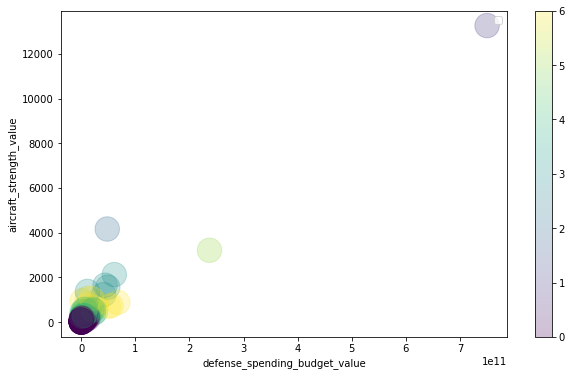

In [193]:

plt.figure(figsize=(10,6))
plt.scatter(df_value['defense_spending_budget_value'] ,x.aircraft_strength_value,c=tahmin,s=600,alpha=0.25)
plt.legend()

plt.xlabel('defense_spending_budget_value')
plt.ylabel('aircraft_strength_value')
plt.colorbar()
plt.show()


In [194]:
import numpy as np

ELBOW - Silouhette scrone azaldığı yer clustering in sayısı olarak belirlenir
En yakın komşu : benzerlikleri buluyor 
ELBOW METHOD kodu aşağıda yazıldı

In [195]:
# ELBOW KODU
# Predicticting the silhouette score for each clusters 
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust (clusters): 
    for no_of_cluster in np.arange(1,clusters): # 1 den cluster sayısına kadar sayı üret. bunu en alt satırda 9 olarak belirledik
        no_of_cluster+=1 # 1 den başladı her döngü 1 tane artırması için bu yazıldı
        model=KMeans(n_clusters = no_of_cluster) # KMeans modelini çağırdı. Her cluster sayısına göre hesap yapıyor
        model=model.fit(x) # fit diyor 2 için 3,4,5,6,7,8,9 için yapıtor
        pred=model.fit_predict(x) #
        sum_of_squared_distances.append(model.inertia_) # uzaklıkları hesaplıyor
        score = silhouette_score(x,pred) # silhoutte score hesaplıyor
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))# sonuçları yazdırıyor
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)
# düşme nerede başlıyorsa ideal olan düşmeden önceki cluster sayısıdır. 

Number of cluster 2,silhouette0.9590291286969782
Number of cluster 3,silhouette0.8291286661764489
Number of cluster 4,silhouette0.7544078255542876
Number of cluster 5,silhouette0.693327311018244
Number of cluster 6,silhouette0.6204342220439885
Number of cluster 7,silhouette0.6143663799174938
Number of cluster 8,silhouette0.5483962198176705
Number of cluster 9,silhouette0.5406280812809147


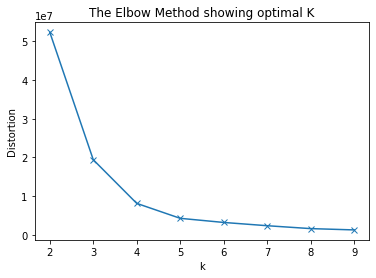

In [196]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show() 


OLUŞAN GRUPLARI İSİMLENDİREBİLİRSİN

0 a ucuz fiyatı az , 1 fiyatı yüksek km çok, 2 fiyat yüksek km az gibi gruplandırma yapabilirsin

In [197]:

#ax=sns.swarmplot(x=x['Military Strength Power Index'],y=x['aircraft_strength_value'],hue=x['cluster'],data=df_value,palette='hot')



In [198]:
# Kümelere ayırdıklarımıza isim veriyoruz. 
'''
d={0:'Ucuz ve az km',1:'Ucuz cok km',2:'Pahali az km', 3: 'Orta'} # burada dictionary ile 0. 1. 2. 3. kümelere isimelr veriyor
x['isim']=x['cluster'].map(d)# burada yukarıda veridğimiz isimleri isim sütunu oluşturarak yazdığmız 0,1,2,3 için tanımları atıyoruz. map fonk. ile

'''

"\nd={0:'Ucuz ve az km',1:'Ucuz cok km',2:'Pahali az km', 3: 'Orta'} # burada dictionary ile 0. 1. 2. 3. kümelere isimelr veriyor\nx['isim']=x['cluster'].map(d)# burada yukarıda veridğimiz isimleri isim sütunu oluşturarak yazdığmız 0,1,2,3 için tanımları atıyoruz. map fonk. ile\n\n"

In [199]:
x

,Military Strength Power Index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,cluster
0,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,4
1,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0
2,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,4
3,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,4
4,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,0
...,...,...,...,...,...,...,...,...,...
133,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,4
134,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,4
135,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,0
136,1.6464,108.0,18.0,0.0,11.0,52.0,27.0,0.0,0


### TANK POWER CLUSTERING

In [200]:
x=df_value[[ 'Military Strength Power Index','tank_strength_value',
       'afv/apc_strength_value', 'self-propelled_artillery_strength_value',
       'towed_artillery_strength_value', 'rocket_projector_strength_value']]



In [201]:
x

,Military Strength Power Index,tank_strength_value,afv/apc_strength_value,self-propelled_artillery_strength_value,towed_artillery_strength_value,rocket_projector_strength_value
0,1.3444,0.0,1062.0,0.0,176.0,50.0
1,2.3137,0.0,467.0,0.0,0.0,0.0
2,0.4659,880.0,7361.0,320.0,240.0,316.0
3,0.8379,379.0,595.0,28.0,357.0,115.0
4,0.6521,370.0,739.0,83.0,172.0,26.0
...,...,...,...,...,...,...
133,0.6449,390.0,600.0,73.0,104.0,36.0
134,0.3559,2615.0,2530.0,70.0,1000.0,85.0
135,1.2412,620.0,615.0,20.0,85.0,150.0
136,1.6464,75.0,184.0,0.0,42.0,50.0


In [202]:
model=KMeans(n_clusters=5)

In [203]:
model=model.fit(x) # burada fark ettiysen y yok. yani sonuç tahmin etmiyor sadece kümeleme

In [204]:
tahmin2=model.predict(x)

In [205]:
x['cluster2']=tahmin2

C:\Users\BOLBAHADIR\AppData\Local\Temp\ipykernel_8796\506382989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster2']=tahmin2


In [206]:
silhouette_score(x,tahmin2) 

0.6806827254870363

In [207]:
clust2=x.assign(Cluster=model.labels_)
model.cluster_centers_.astype('int')
model.labels_

array([0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 0, 0, 0, 3, 0, 2, 2, 0, 3, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 3, 0, 0, 2, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 2, 1, 0,
       0, 0, 2, 0, 0, 0])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


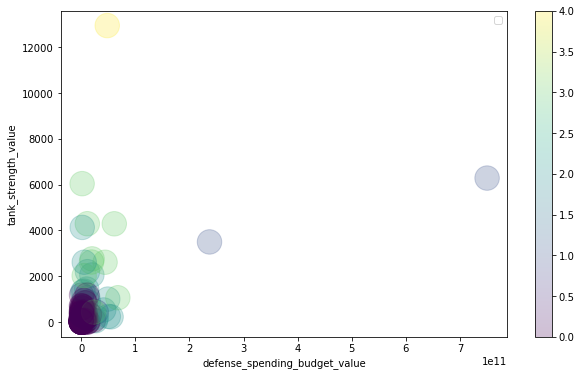

In [208]:
plt.figure(figsize=(10,6))
plt.scatter(df_value['defense_spending_budget_value'] ,x.tank_strength_value,c=tahmin2,s=600,alpha=0.25)
plt.legend()
plt.xlabel('defense_spending_budget_value')
plt.ylabel('tank_strength_value')
plt.colorbar()
plt.show()

In [209]:
# ELBOW KODU
# Predicticting the silhouette score for each clusters 
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust (clusters): 
    for no_of_cluster in np.arange(1,clusters): # 1 den cluster sayısına kadar sayı üret. bunu en alt satırda 9 olarak belirledik
        no_of_cluster+=1 # 1 den başladı her döngü 1 tane artırması için bu yazıldı
        model=KMeans(n_clusters = no_of_cluster) # KMeans modelini çağırdı. Her cluster sayısına göre hesap yapıyor
        model=model.fit(x) # fit diyor 2 için 3,4,5,6,7,8,9 için yapıtor
        pred=model.fit_predict(x) #
        sum_of_squared_distances.append(model.inertia_) # uzaklıkları hesaplıyor
        score = silhouette_score(x,pred) # silhoutte score hesaplıyor
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))# sonuçları yazdırıyor
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)

Number of cluster 2,silhouette0.9038238819851935
Number of cluster 3,silhouette0.7986778976185992
Number of cluster 4,silhouette0.685713813094312
Number of cluster 5,silhouette0.6747454253015488
Number of cluster 6,silhouette0.5661390741033039
Number of cluster 7,silhouette0.5651143920219484
Number of cluster 8,silhouette0.5509491266177895
Number of cluster 9,silhouette0.5053389722824779


In [210]:
df_value.columns

Index(['Military Strength Power Index', 'aircraft_strength_value',
       'fighter/interceptor_strength_value', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength_value',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength_value',
       'attack_helicopter_fleet_strength_value', 'tank_strength_value',
       'afv/apc_strength_value', 'self-propelled_artillery_strength_value',
       'towed_artillery_strength_value', 'rocket_projector_strength_value',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength_value',
       'submarine_fleet_strength_value', 'destroyer_fleet_strength_value',
       'frigate_fleet_strength_value', 'defense_spending_budget_value',
       'external_debt_value', 'airport_totals_value', 'oil_production_value',
       'oil_consumption_value', 'proven_oil_reserves_value',
       'available_manpower_value', 'total_population_value',
       'total_square_land_area_value', 'total_coastline_coverage_value',
       '

### NAVY POWER CLUSTERING

In [211]:
x=df_value[['Military Strength Power Index','navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength_value',
       'submarine_fleet_strength_value', 'destroyer_fleet_strength_value',
       'frigate_fleet_strength_value']]

In [212]:
model=KMeans(n_clusters=6)

In [213]:
model=model.fit(x)

In [214]:
tahmin4=model.predict(x)

In [215]:
x['cluster4']=tahmin4

C:\Users\BOLBAHADIR\AppData\Local\Temp\ipykernel_8796\2319734996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster4']=tahmin4


In [216]:
silhouette_score(x,tahmin4)

0.6155771038569572

In [217]:
clust4=x.assign(Cluster=model.labels_)
model.cluster_centers_.astype('int')
model.labels_

array([4, 0, 5, 0, 0, 4, 0, 4, 4, 0, 5, 4, 4, 4, 5, 4, 4, 5, 4, 4, 4, 0,
       0, 4, 4, 0, 2, 1, 4, 4, 4, 4, 0, 4, 4, 3, 4, 4, 4, 3, 5, 4, 4, 0,
       4, 5, 4, 0, 4, 3, 3, 1, 0, 4, 0, 3, 4, 5, 0, 4, 4, 0, 4, 0, 4, 0,
       4, 4, 4, 4, 0, 4, 4, 5, 4, 4, 4, 5, 4, 5, 4, 4, 0, 4, 4, 4, 0, 2,
       4, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 4, 4, 0, 4, 4, 4, 4,
       3, 4, 0, 0, 4, 4, 0, 4, 0, 5, 4, 4, 3, 0, 5, 4, 4, 4, 0, 0, 1, 4,
       4, 0, 0, 4, 4, 4])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


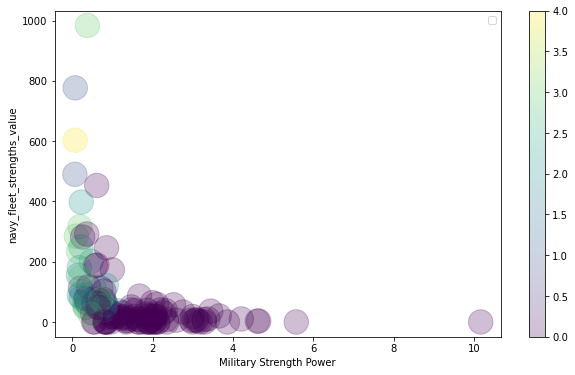

In [218]:
plt.figure(figsize=(10,6))
plt.scatter(x['Military Strength Power Index'] ,x.navy_fleet_strengths_value,c=tahmin2,s=600,alpha=0.25)
plt.legend()
plt.xlabel('Military Strength Power')
plt.ylabel('navy_fleet_strengths_value')
plt.colorbar()
plt.show()

In [219]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust (clusters): 
    for no_of_cluster in np.arange(1,clusters): # 1 den cluster sayısına kadar sayı üret. bunu en alt satırda 9 olarak belirledik
        no_of_cluster+=1 # 1 den başladı her döngü 1 tane artırması için bu yazıldı
        model=KMeans(n_clusters = no_of_cluster) # KMeans modelini çağırdı. Her cluster sayısına göre hesap yapıyor
        model=model.fit(x) # fit diyor 2 için 3,4,5,6,7,8,9 için yapıtor
        pred=model.fit_predict(x) #
        sum_of_squared_distances.append(model.inertia_) # uzaklıkları hesaplıyor
        score = silhouette_score(x,pred) # silhoutte score hesaplıyor
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))# sonuçları yazdırıyor
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)

Number of cluster 2,silhouette0.8508366202546348
Number of cluster 3,silhouette0.7757873375065697
Number of cluster 4,silhouette0.7550187243113671
Number of cluster 5,silhouette0.6295645524853409
Number of cluster 6,silhouette0.6155771038569572
Number of cluster 7,silhouette0.6093943921812657
Number of cluster 8,silhouette0.6058505609964248
Number of cluster 9,silhouette0.5963001613780571


In [220]:
clust4=x.assign(Cluster=model.labels_)
model.cluster_centers_.astype('int')
model.labels_

array([4, 0, 5, 0, 0, 4, 0, 4, 4, 0, 5, 4, 4, 4, 5, 4, 4, 5, 4, 4, 4, 0,
       0, 4, 4, 0, 2, 1, 4, 4, 4, 4, 0, 4, 4, 3, 4, 4, 4, 3, 5, 4, 4, 0,
       4, 5, 4, 0, 4, 3, 3, 1, 0, 4, 0, 3, 4, 5, 0, 4, 4, 0, 4, 0, 4, 0,
       4, 4, 4, 4, 0, 4, 4, 5, 4, 4, 4, 5, 4, 5, 4, 4, 0, 4, 4, 4, 0, 2,
       4, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 4, 4, 0, 4, 4, 4, 4,
       3, 4, 0, 0, 4, 4, 0, 4, 0, 5, 4, 4, 3, 0, 5, 4, 4, 4, 0, 0, 1, 4,
       4, 0, 0, 4, 4, 4])

### ASSET & BUDGET CLUSTERING

In [221]:
x=df_value[['Military Strength Power Index','defense_spending_budget_value',
       'external_debt_value', 'airport_totals_value', 'oil_production_value',
       'oil_consumption_value', 'proven_oil_reserves_value',]]

In [222]:
model=KMeans(n_clusters=6)

In [223]:
model=model.fit(x)

In [224]:
tahmin5=model.predict(x)

In [225]:
silhouette_score(x,tahmin5)

0.7789466712925174

In [226]:
x['cluster5']=tahmin5

C:\Users\BOLBAHADIR\AppData\Local\Temp\ipykernel_8796\2652658576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster5']=tahmin5


In [227]:
clust5=x.assign(Cluster=model.labels_)
model.cluster_centers_.astype('int')
model.labels_

array([0, 0, 0, 0, 0, 0, 3, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0,
       3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 5, 0, 0, 0, 5, 5, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 5, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 0,
       5, 0, 3, 0, 0, 0, 5, 3, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 4, 1, 0,
       0, 0, 0, 0, 0, 0])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


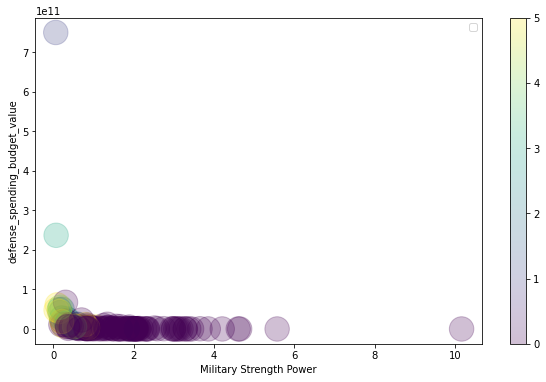

In [228]:
plt.figure(figsize=(10,6))
plt.scatter(x['Military Strength Power Index'] ,x.defense_spending_budget_value,c=tahmin5,s=600,alpha=0.25)
plt.legend()
plt.xlabel('Military Strength Power')
plt.ylabel('defense_spending_budget_value')
plt.colorbar()
plt.show()

<AxesSubplot:ylabel='Count'>

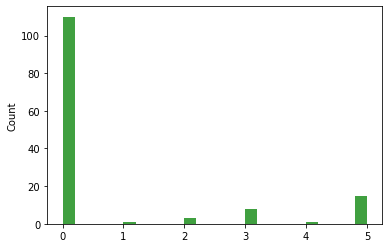

In [229]:
sns.histplot(tahmin5, bins=25,color='green',edgecolor=None)

In [230]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust (clusters): 
    for no_of_cluster in np.arange(1,clusters): # 1 den cluster sayısına kadar sayı üret. bunu en alt satırda 9 olarak belirledik
        no_of_cluster+=1 # 1 den başladı her döngü 1 tane artırması için bu yazıldı
        model=KMeans(n_clusters = no_of_cluster) # KMeans modelini çağırdı. Her cluster sayısına göre hesap yapıyor
        model=model.fit(x) # fit diyor 2 için 3,4,5,6,7,8,9 için yapıtor
        pred=model.fit_predict(x) #
        sum_of_squared_distances.append(model.inertia_) # uzaklıkları hesaplıyor
        score = silhouette_score(x,pred) # silhoutte score hesaplıyor
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))# sonuçları yazdırıyor
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)

Number of cluster 2,silhouette0.9227153321828783
Number of cluster 3,silhouette0.8995443160804507
Number of cluster 4,silhouette0.8671436998127438
Number of cluster 5,silhouette0.8675196269901567
Number of cluster 6,silhouette0.7789466712925174
Number of cluster 7,silhouette0.7817951821133908
Number of cluster 8,silhouette0.7847428272864684
Number of cluster 9,silhouette0.6833756861311274


### MILITARY HUMAN POWER CLUSTERING

In [231]:
x=df_value[['Military Strength Power Index','available_manpower_value', 'total_population_value',
       'total_square_land_area_value', 'total_coastline_coverage_value',
       'total_waterway_coverage_value', 'total_border_coverage_value']]

In [232]:
yh=x['total_square_land_area_value']/x['available_manpower_value']
yh

0      0.045529
1      0.018920
2      0.114831
3      0.199657
4      0.137784
         ...   
133    0.063958
134    0.006489
135    0.046863
136    0.122041
137    0.069977
Length: 138, dtype: float64

In [233]:
model=KMeans(n_clusters=6)

In [234]:
model=model.fit(x)

In [235]:
tahmin6=model.predict(x)

In [236]:
x['cluster6']=tahmin6

C:\Users\BOLBAHADIR\AppData\Local\Temp\ipykernel_8796\4176354100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster6']=tahmin6


In [237]:
tahmin6

array([5, 0, 5, 5, 5, 0, 5, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 5,
       5, 0, 0, 0, 1, 5, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3,
       5, 0, 0, 0, 0, 1, 2, 3, 5, 0, 0, 5, 5, 3, 0, 0, 5, 0, 0, 0, 0, 0,
       0, 0, 0, 5, 5, 0, 0, 3, 0, 0, 0, 5, 5, 5, 0, 5, 0, 0, 0, 0, 4, 5,
       0, 0, 0, 4, 0, 0, 5, 3, 5, 0, 0, 0, 0, 4, 5, 0, 0, 0, 0, 0, 0, 5,
       5, 0, 5, 5, 5, 0, 0, 0, 0, 5, 0, 5, 3, 0, 3, 0, 5, 5, 0, 3, 2, 0,
       5, 5, 3, 5, 0, 0])

In [238]:
clust6=x.assign(Cluster=model.labels_)
model.cluster_centers_.astype('int')
model.labels_

array([5, 0, 5, 5, 5, 0, 5, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 5,
       5, 0, 0, 0, 1, 5, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3,
       5, 0, 0, 0, 0, 1, 2, 3, 5, 0, 0, 5, 5, 3, 0, 0, 5, 0, 0, 0, 0, 0,
       0, 0, 0, 5, 5, 0, 0, 3, 0, 0, 0, 5, 5, 5, 0, 5, 0, 0, 0, 0, 4, 5,
       0, 0, 0, 4, 0, 0, 5, 3, 5, 0, 0, 0, 0, 4, 5, 0, 0, 0, 0, 0, 0, 5,
       5, 0, 5, 5, 5, 0, 0, 0, 0, 5, 0, 5, 3, 0, 3, 0, 5, 5, 0, 3, 2, 0,
       5, 5, 3, 5, 0, 0])

In [239]:
x['cluster6'].value_counts()

0    81
5    35
3    13
4     5
1     2
2     2
Name: cluster6, dtype: int64

In [240]:
silhouette_score(x,tahmin6)

0.6427285515712197

C:\Users\BOLBAHADIR\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


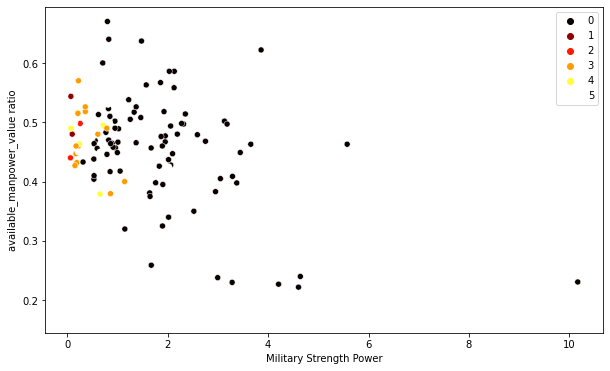

In [241]:
plt.figure(figsize=(10,6))
sns.scatterplot(x['Military Strength Power Index'] ,x['available_manpower_value']/x['total_population_value'],hue=x['cluster6'],data=df_value,palette='hot')
plt.legend()
plt.xlabel('Military Strength Power')
plt.ylabel('available_manpower_value ratio')
#plt.colorbar()
plt.show()

<AxesSubplot:ylabel='Count'>

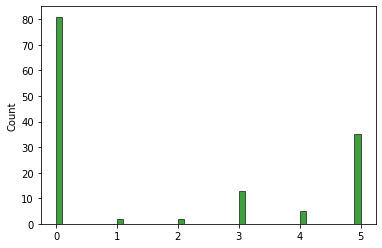

In [242]:
sns.histplot(tahmin6,bins=50,color="green")

In [243]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust (clusters): 
    for no_of_cluster in np.arange(1,clusters): # 1 den cluster sayısına kadar sayı üret. bunu en alt satırda 9 olarak belirledik
        no_of_cluster+=1 # 1 den başladı her döngü 1 tane artırması için bu yazıldı
        model=KMeans(n_clusters = no_of_cluster) # KMeans modelini çağırdı. Her cluster sayısına göre hesap yapıyor
        model=model.fit(x) # fit diyor 2 için 3,4,5,6,7,8,9 için yapıtor
        pred=model.fit_predict(x) #
        sum_of_squared_distances.append(model.inertia_) # uzaklıkları hesaplıyor
        score = silhouette_score(x,pred) # silhoutte score hesaplıyor
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))# sonuçları yazdırıyor
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)

Number of cluster 2,silhouette0.964801471234528
Number of cluster 3,silhouette0.7972165833152037
Number of cluster 4,silhouette0.7303892835342664
Number of cluster 5,silhouette0.6487692478661296
Number of cluster 6,silhouette0.6493793136615752
Number of cluster 7,silhouette0.6368236802168717
Number of cluster 8,silhouette0.6011620988150186
Number of cluster 9,silhouette0.6044169102960126


### WHOLE DATA CLUSTERING

In [244]:
wd=pd.DataFrame(data=(tahmin,tahmin6,tahmin5,tahmin4,tahmin2))

In [245]:
x=wd.transpose()

In [246]:
x

,0,1,2,3,4
0,4,5,0,4,0
1,0,0,0,0,0
2,4,5,0,5,2
3,4,5,0,0,0
4,0,5,0,0,0
...,...,...,...,...,...
133,4,5,0,0,0
134,4,3,0,0,2
135,0,5,0,4,0
136,0,0,0,4,0


In [247]:
model=KMeans(n_clusters=9)

In [248]:
model=model.fit(x)

In [249]:
tahmin7=model.predict(x)

In [250]:
x['cluster7']=tahmin7

In [251]:
silhouette_score(x,tahmin7)

0.7332122244834978

In [252]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust (clusters): 
    for no_of_cluster in np.arange(1,clusters): # 1 den cluster sayısına kadar sayı üret. bunu en alt satırda 9 olarak belirledik
        no_of_cluster+=1 # 1 den başladı her döngü 1 tane artırması için bu yazıldı
        model=KMeans(n_clusters = no_of_cluster) # KMeans modelini çağırdı. Her cluster sayısına göre hesap yapıyor
        model=model.fit(x) # fit diyor 2 için 3,4,5,6,7,8,9 için yapıtor
        pred=model.fit_predict(x) #
        sum_of_squared_distances.append(model.inertia_) # uzaklıkları hesaplıyor
        score = silhouette_score(x,pred) # silhoutte score hesaplıyor
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))# sonuçları yazdırıyor
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(15)

C:\Users\BOLBAHADIR\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\BOLBAHADIR\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\BOLBAHADIR\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\BOLBAHADIR\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users

Number of cluster 2,silhouette0.4122431066855075
Number of cluster 3,silhouette0.5228631115842994
Number of cluster 4,silhouette0.5715170439568673
Number of cluster 5,silhouette0.6376783160184755
Number of cluster 6,silhouette0.6717612439580992


C:\Users\BOLBAHADIR\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\BOLBAHADIR\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\BOLBAHADIR\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\BOLBAHADIR\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users

Number of cluster 7,silhouette0.6854261210055727
Number of cluster 8,silhouette0.7011897732099027
Number of cluster 9,silhouette0.7332122244834978
Number of cluster 10,silhouette0.7270839068818089


C:\Users\BOLBAHADIR\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\BOLBAHADIR\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\BOLBAHADIR\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\BOLBAHADIR\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users

Number of cluster 11,silhouette0.7413549813398241
Number of cluster 12,silhouette0.7177354975788437
Number of cluster 13,silhouette0.7335524434049618
Number of cluster 14,silhouette0.7335924404608869
Number of cluster 15,silhouette0.7308780542359116


C:\Users\BOLBAHADIR\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\BOLBAHADIR\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\BOLBAHADIR\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\BOLBAHADIR\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [253]:
x.insert(0, "country", df["country"])
x.insert(1, "Military Strength Power Index", df["military_strength_power_index"])

In [254]:
x

,country,Military Strength Power Index,0,1,2,3,4,cluster7
0,Afghanistan,1.3444,4,5,0,4,0,5
1,Albania,2.3137,0,0,0,0,0,6
2,Algeria,0.4659,4,5,0,5,2,5
3,Angola,0.8379,4,5,0,0,0,1
4,Argentina,0.6521,0,5,0,0,0,7
...,...,...,...,...,...,...,...,...
133,Venezuela,0.6449,4,5,0,0,0,1
134,Vietnam,0.3559,4,3,0,0,2,1
135,Yemen,1.2412,0,5,0,4,0,3
136,Zambia,1.6464,0,0,0,4,0,2


In [255]:
x=x.rename({0:'Air_craft_power',1:'Military_human_power',2:'Asset_Budget', 3: 'Navy_power',4:'Tank_power'},axis=1) # burada dictionary ile 0. 1. 2. 3. kümelere isimelr veriyor


array([[<AxesSubplot:title={'center':'Military Strength Power Index'}>,
        <AxesSubplot:title={'center':'Air_craft_power'}>,
        <AxesSubplot:title={'center':'Military_human_power'}>],
       [<AxesSubplot:title={'center':'Asset_Budget'}>,
        <AxesSubplot:title={'center':'Navy_power'}>,
        <AxesSubplot:title={'center':'Tank_power'}>],
       [<AxesSubplot:title={'center':'cluster7'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

<Figure size 1440x1440 with 0 Axes>

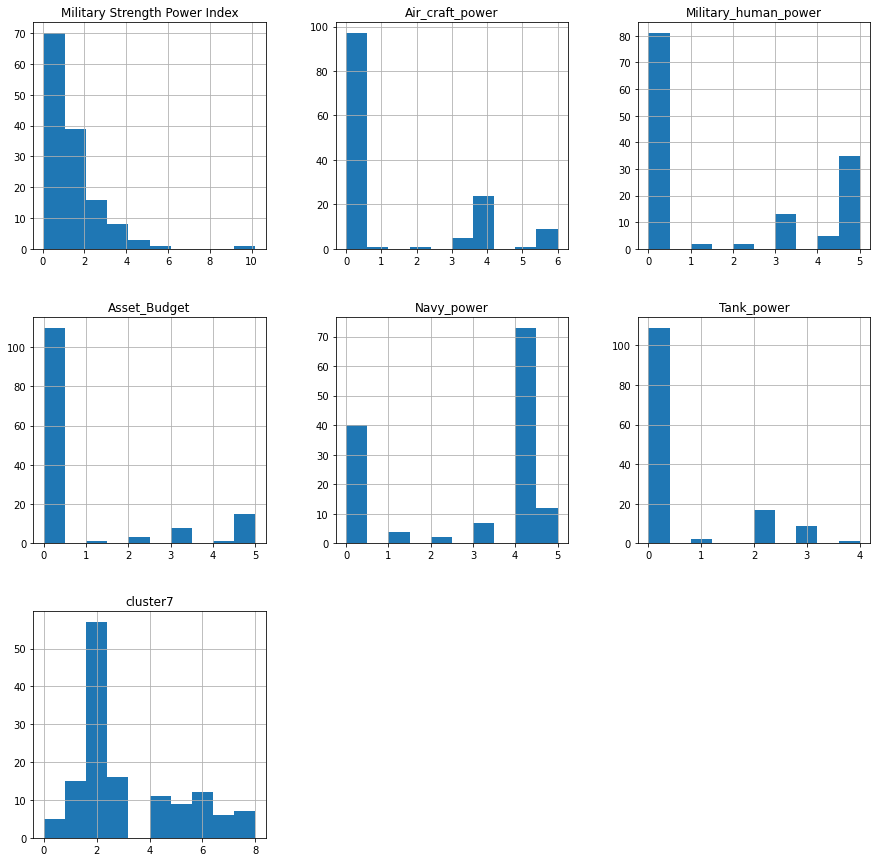

In [256]:
plt.figure(figsize=(20,20))
x.hist(figsize=(15,15))


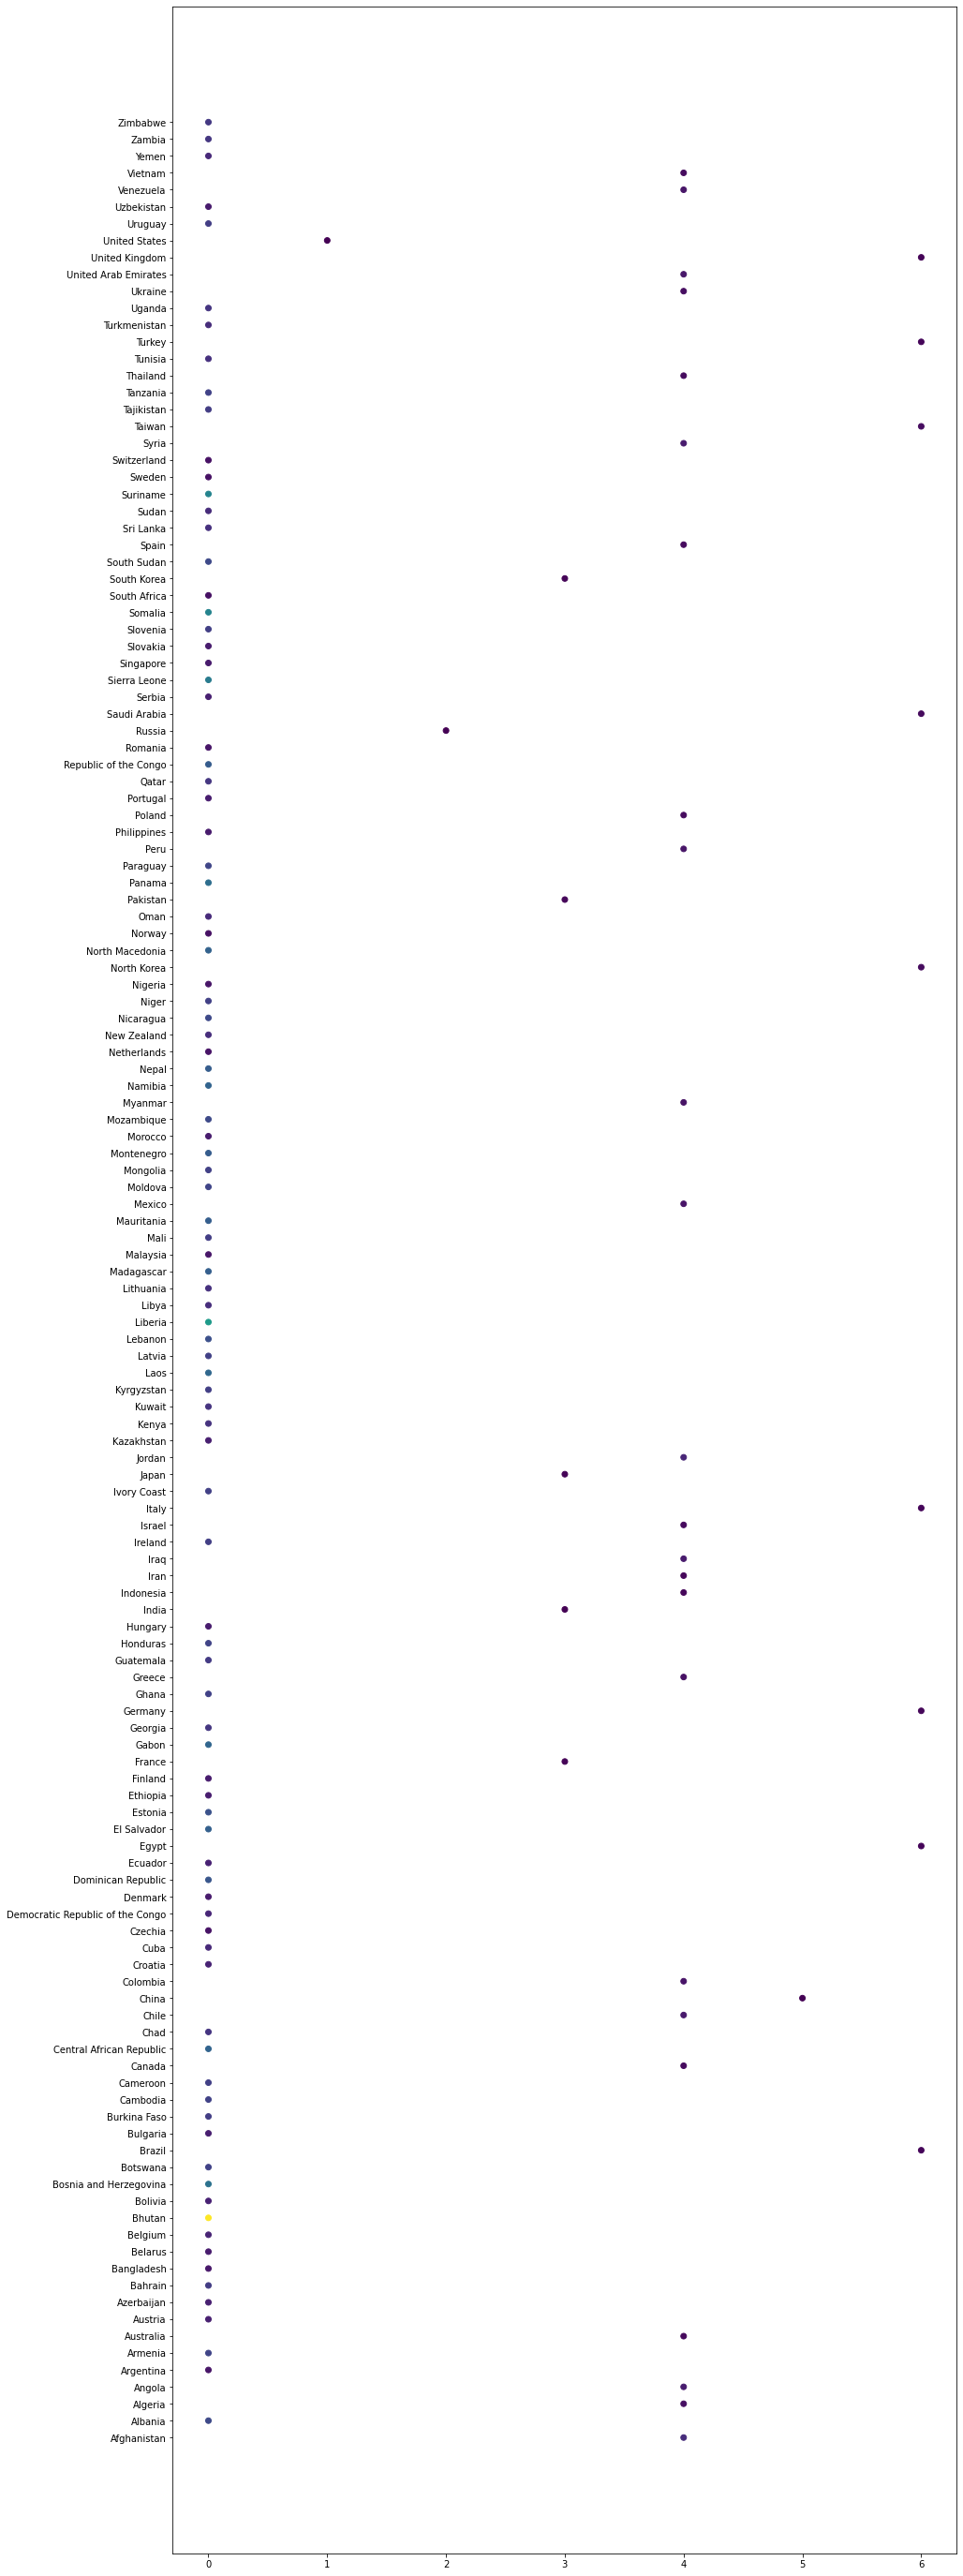

In [257]:
plt.figure(figsize=(15,50))
plt.scatter(x.Air_craft_power,x.country,c=x['Military Strength Power Index'])

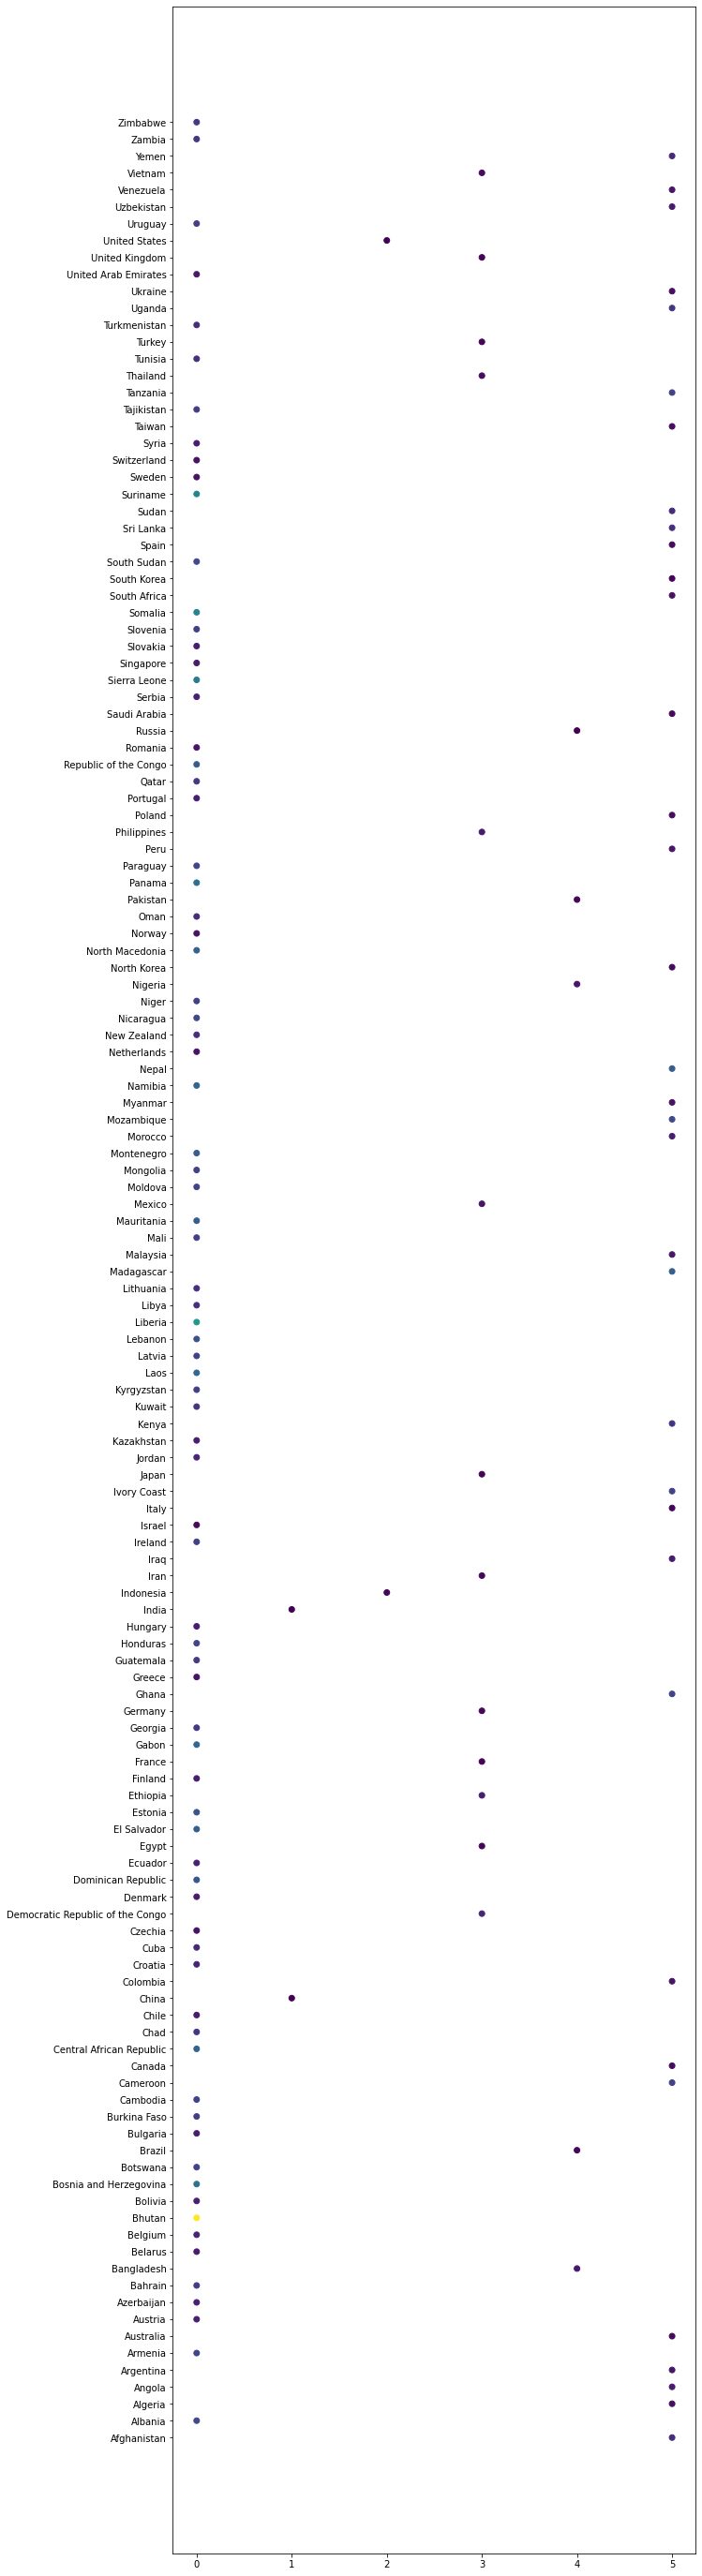

In [258]:
plt.figure(figsize=(10,50))
plt.scatter(x.Military_human_power,x.country,c=x['Military Strength Power Index'])

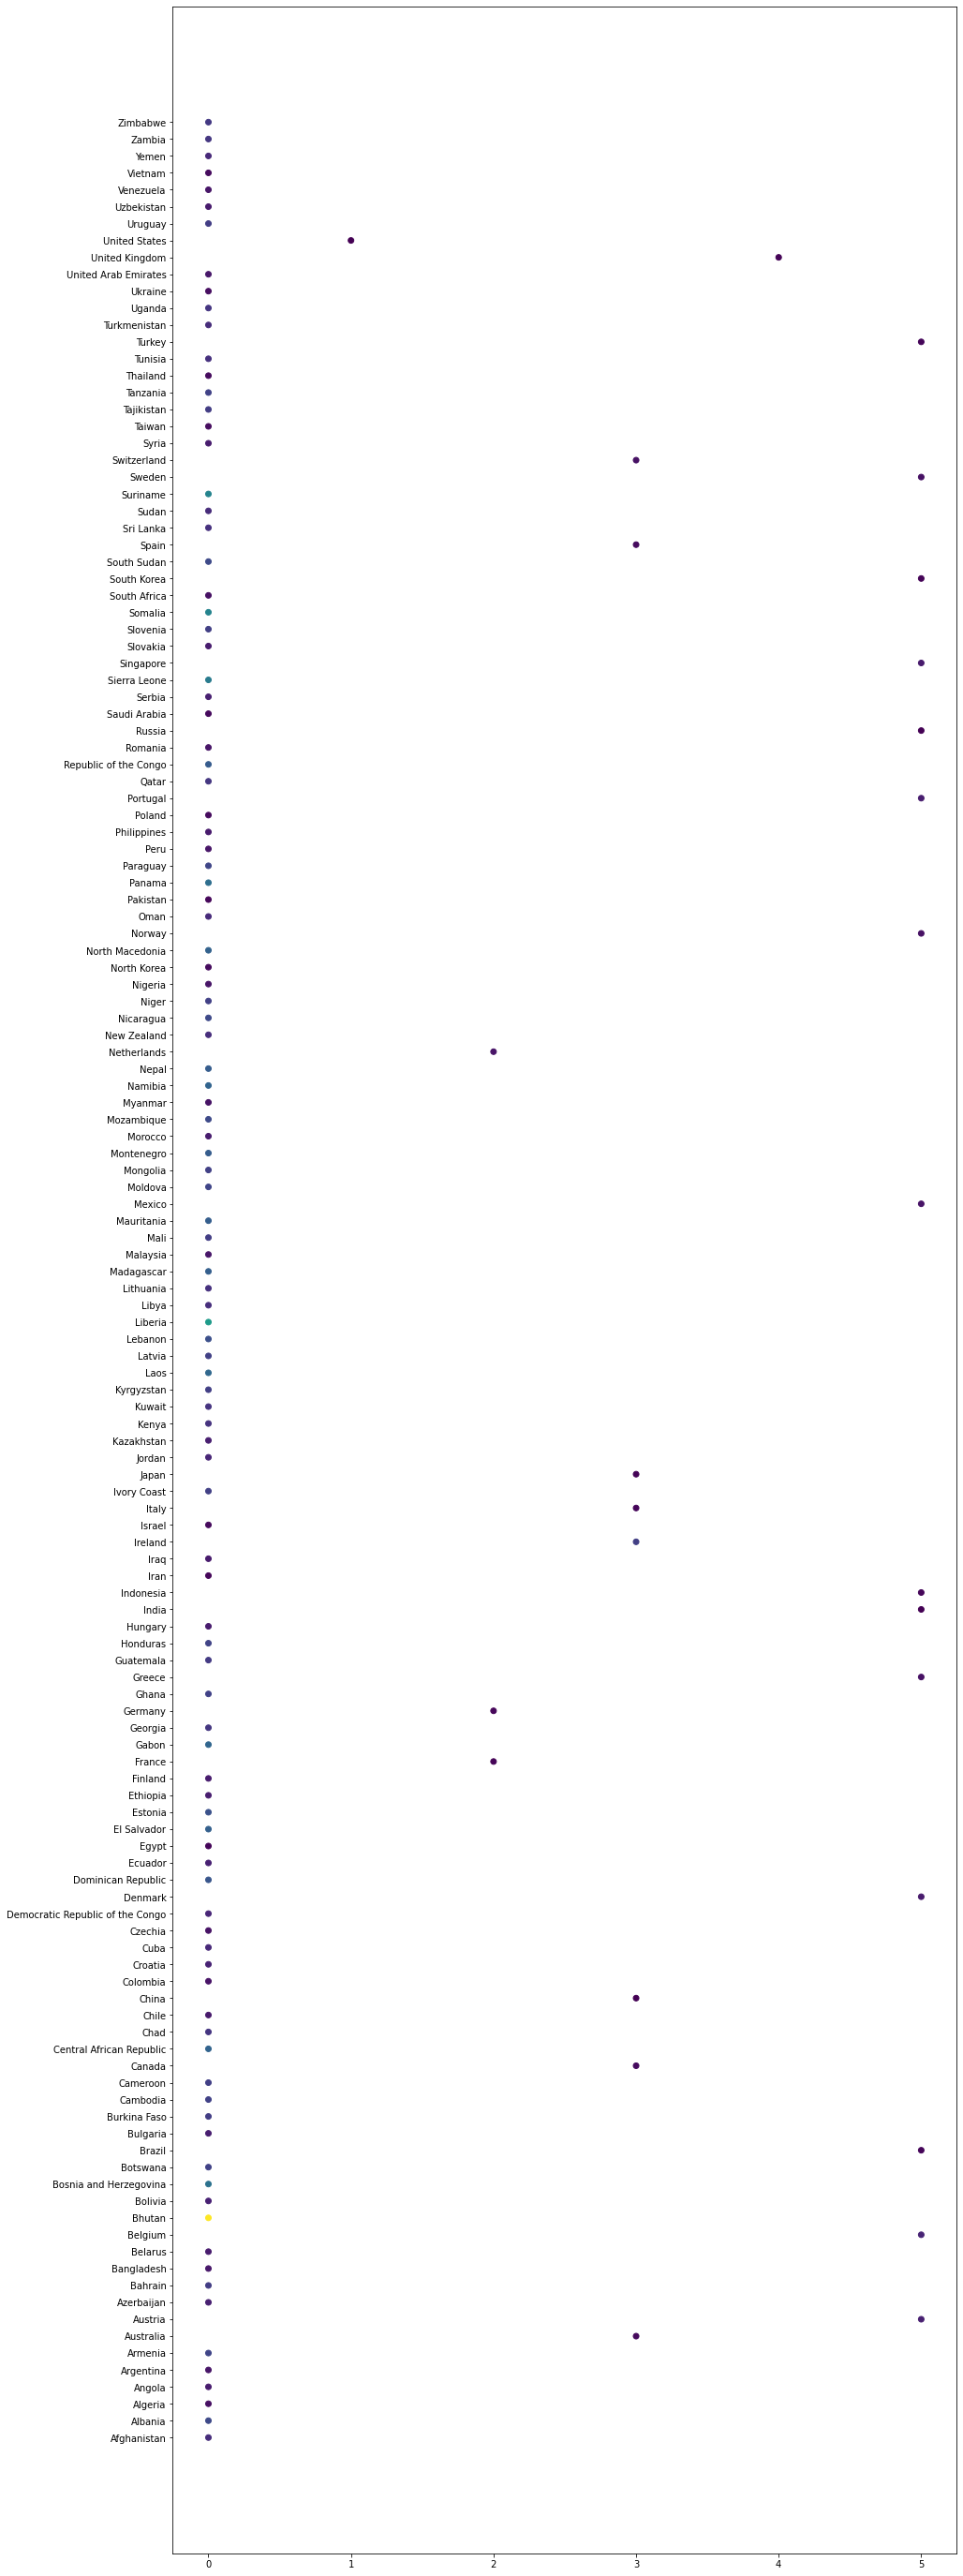

In [259]:
plt.figure(figsize=(15,50))
plt.scatter(x.Asset_Budget,x.country,c=x['Military Strength Power Index'])

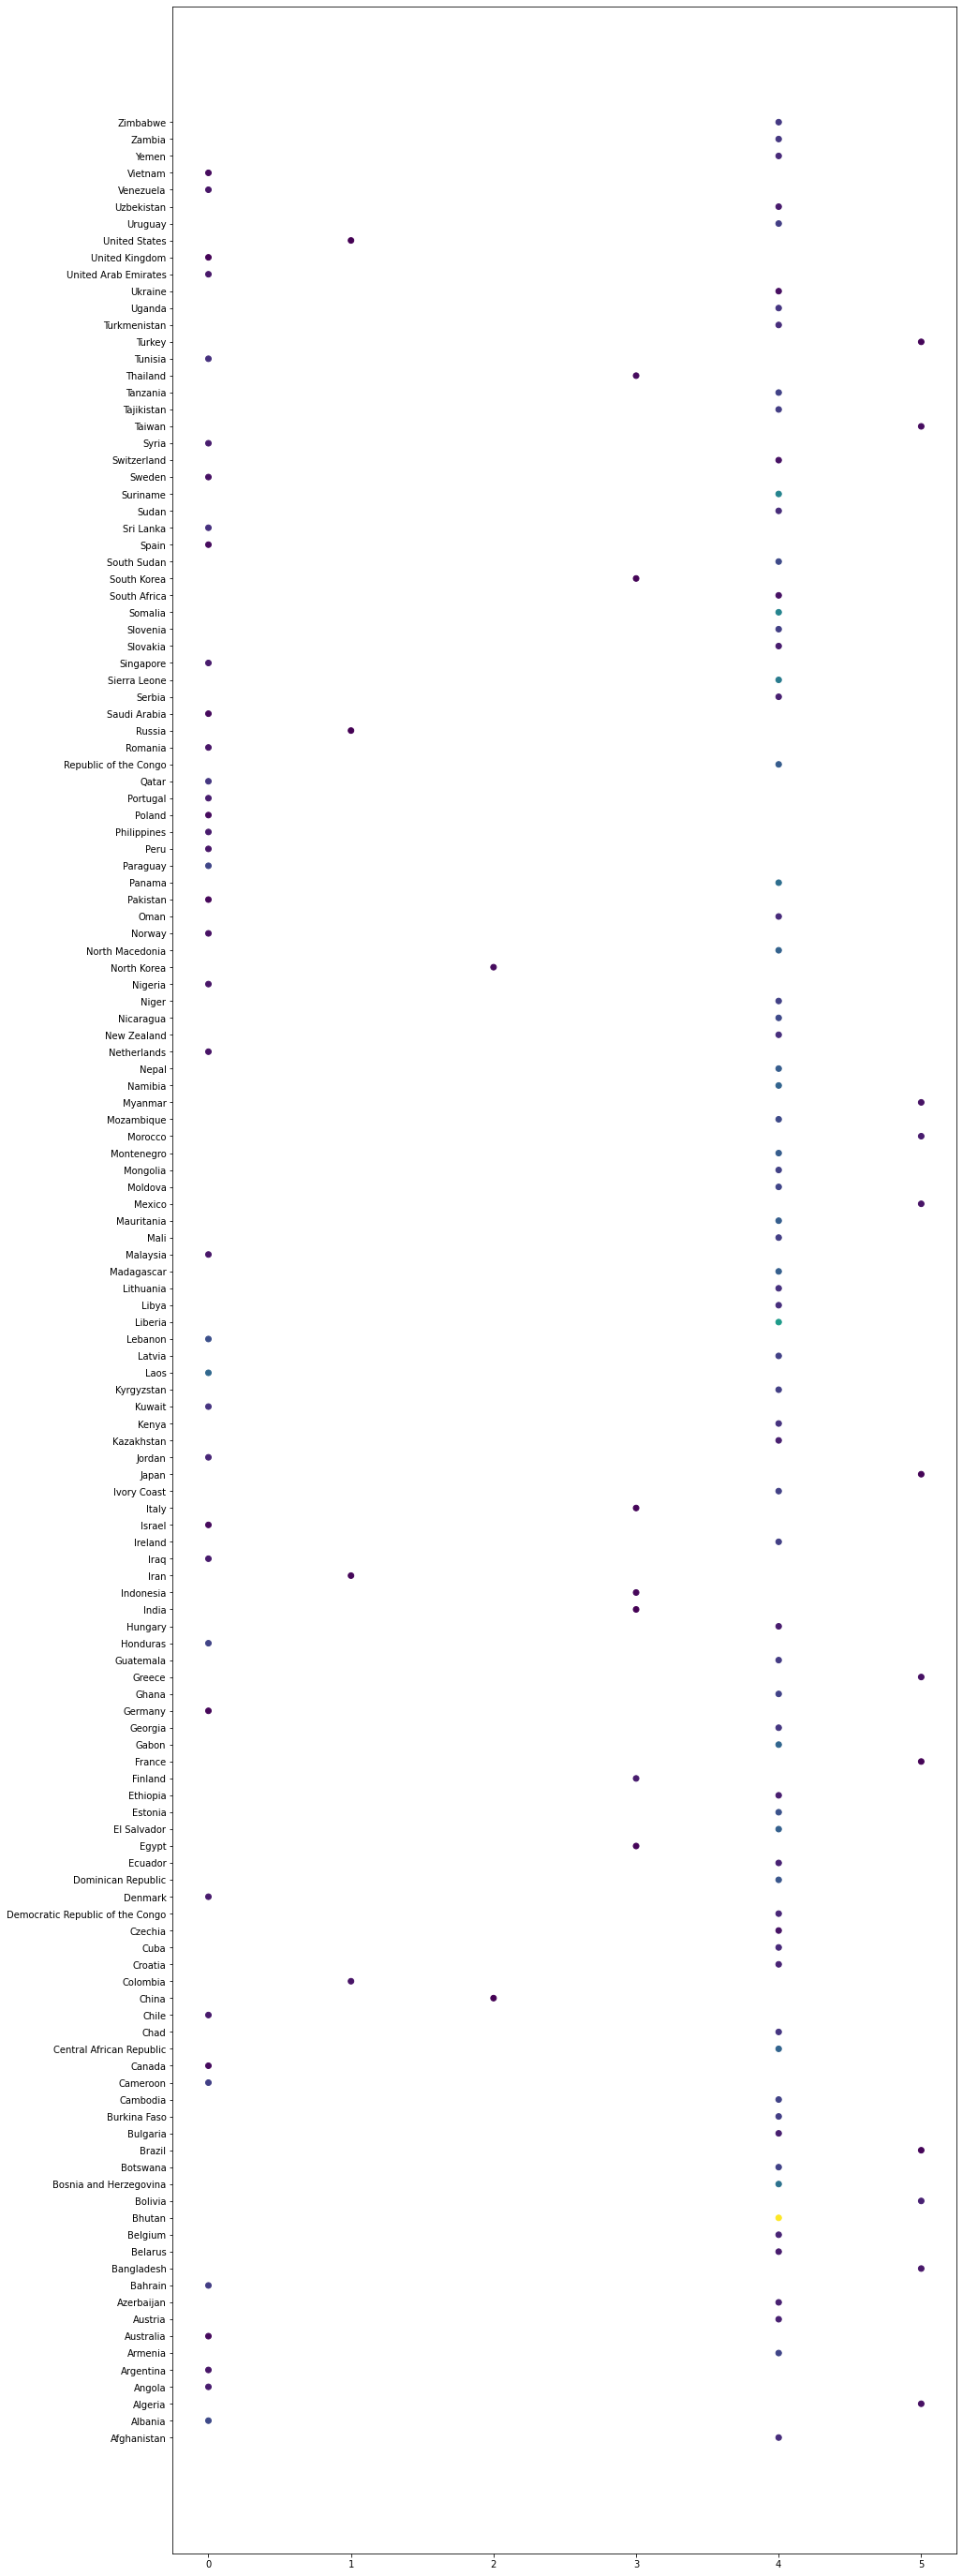

In [260]:
plt.figure(figsize=(15,50))
plt.scatter(x.Navy_power,x.country,c=x['Military Strength Power Index'])

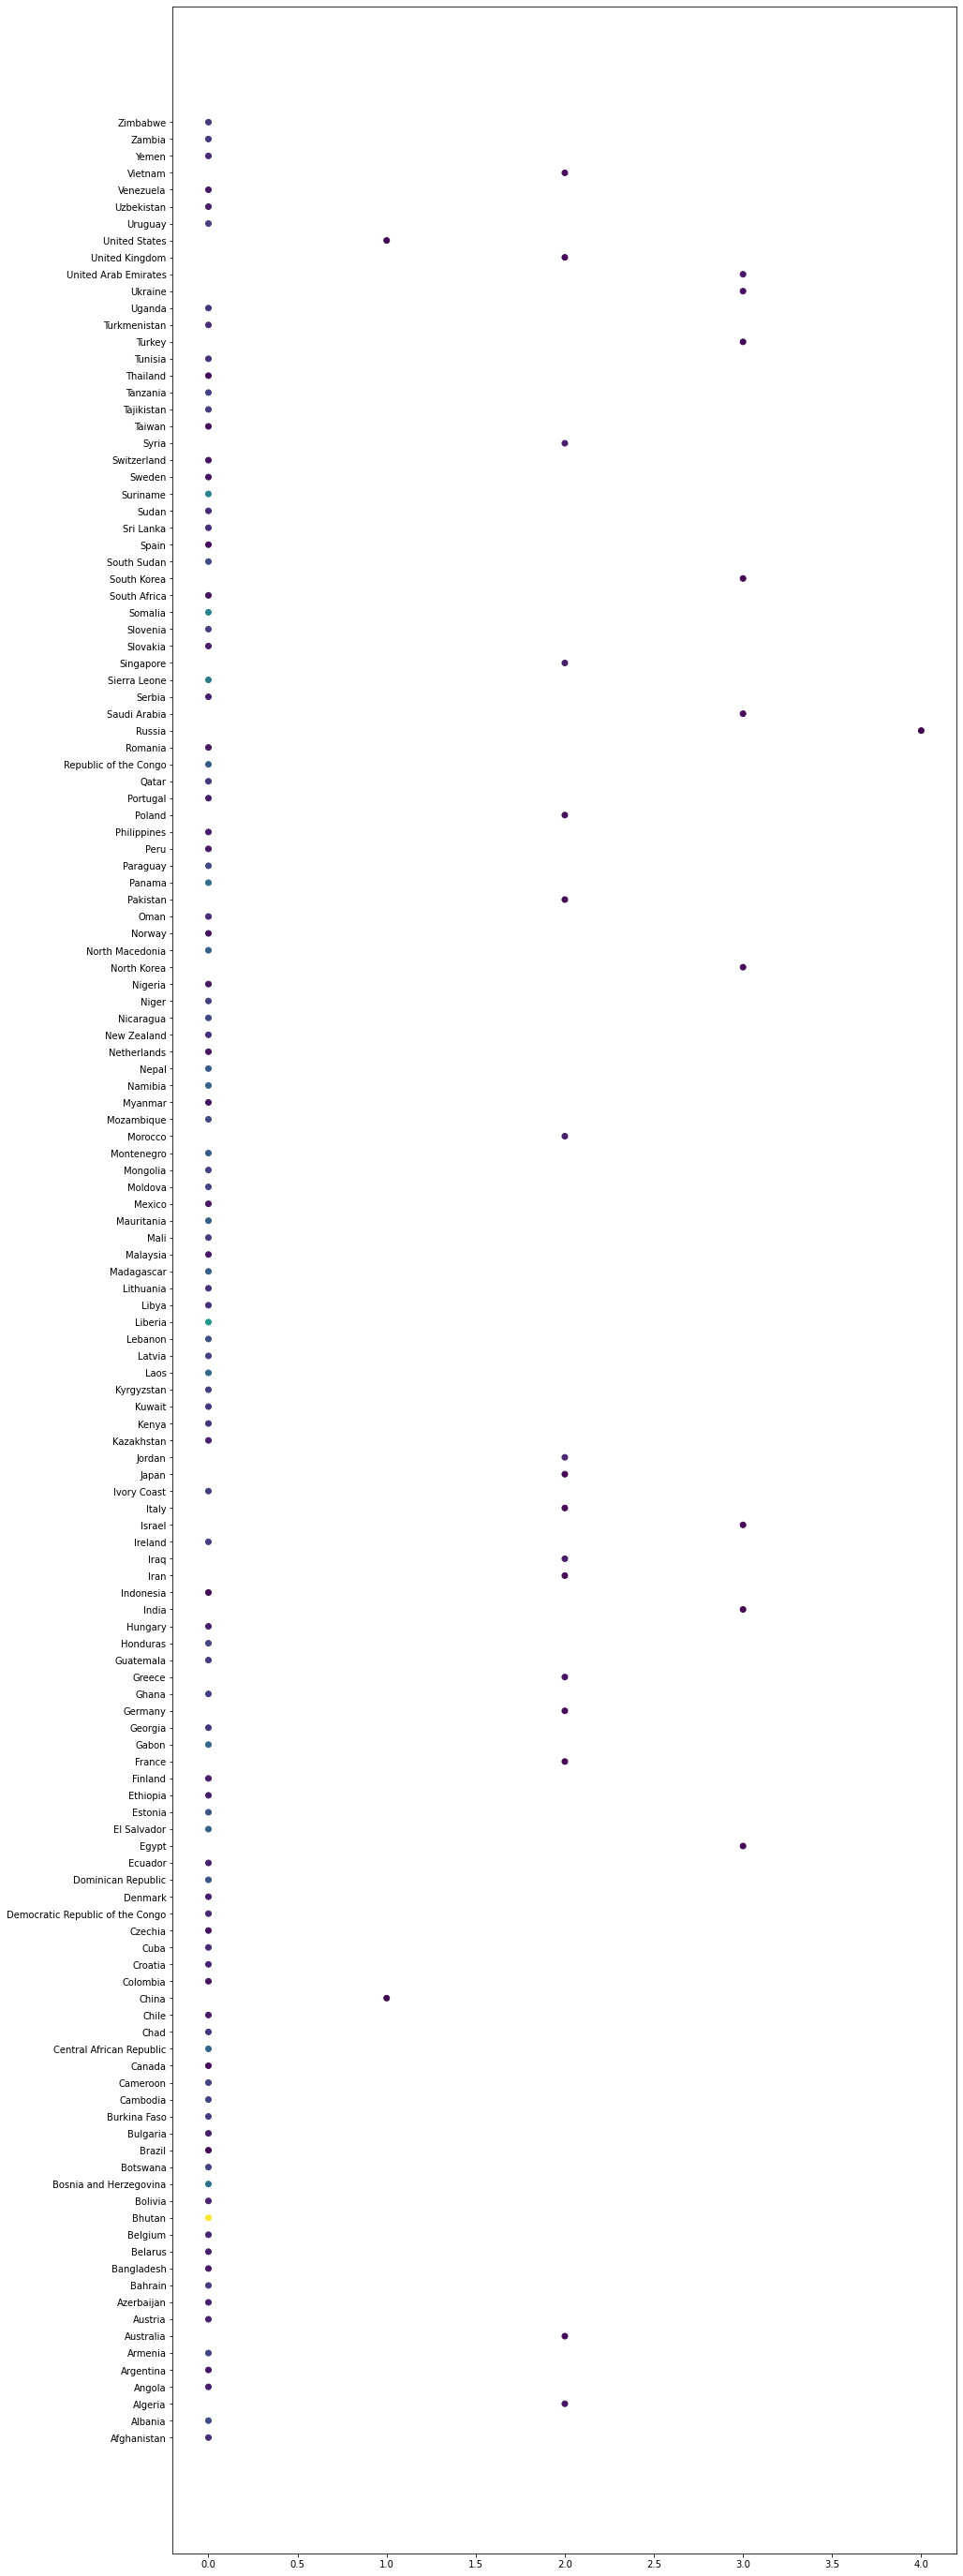

In [261]:
plt.figure(figsize=(15,50))
plt.scatter(x.Tank_power,x.country,c=x['Military Strength Power Index'])

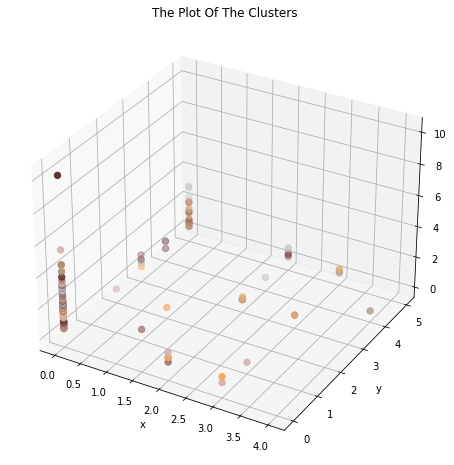

In [292]:
from matplotlib import colors
fig = plt.figure(figsize=(10,8))
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x.Tank_power,x.Military_human_power,x['Military Strength Power Index'], s=40,c=wd.columns, marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.xlabel('x')
plt.ylabel('y')

plt.show()